<a href="https://colab.research.google.com/github/vaishnavich26/Complete-Python-3-Bootcamp/blob/master/Avacado_timeseriesanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Avacado Price Forecasting** 🥑

Aim :


*   To predict / forecast the average price of Avocado based on time series data.
*   It is a typical Time Series Analysis problem.



## Data Preparation

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')


In [ ]:
# import pandas as pd
# file_path = '/content/drive/My Drive/avocado.csv'
# data = pd.read_csv(file_path)


In [ ]:
#Data Extraction
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/IndiraAryal/Predictive_Project/main/avocado.csv')
data.head()
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


## **Dataset Attributes**


**Date** :The date of the observation

**AveragePrice** : the average price of a single avocado

**Total Volume** : Total number of avocados sold

**4046** : Total number of avocados with PLU 4046 sold

**4225** : Total number of avocados with PLU 4225 sold

**4770** : Total number of avocados with PLU 4770 sold

**Total Bags** : Total number of bags

**Small Bags** : Total number of small bags

**Large Bags** : Total number of large bags

**XLarge Bags** : Extra Large Bags

**type** : conventional or organic

**year** : year of the date

**region** : the city or region of the observation

In [ ]:
#checking Null Values

null_summary = data.isnull().sum()
print(null_summary)

if data.isnull().values.any():
    print("There are null values in the dataset.")
else:
    print("There are no null values in the dataset.")

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64
There are no null values in the dataset.


In [ ]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18249.0,24.232232,1.548104e+01,0.00,10.00,24.00,38.00,52.00
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65


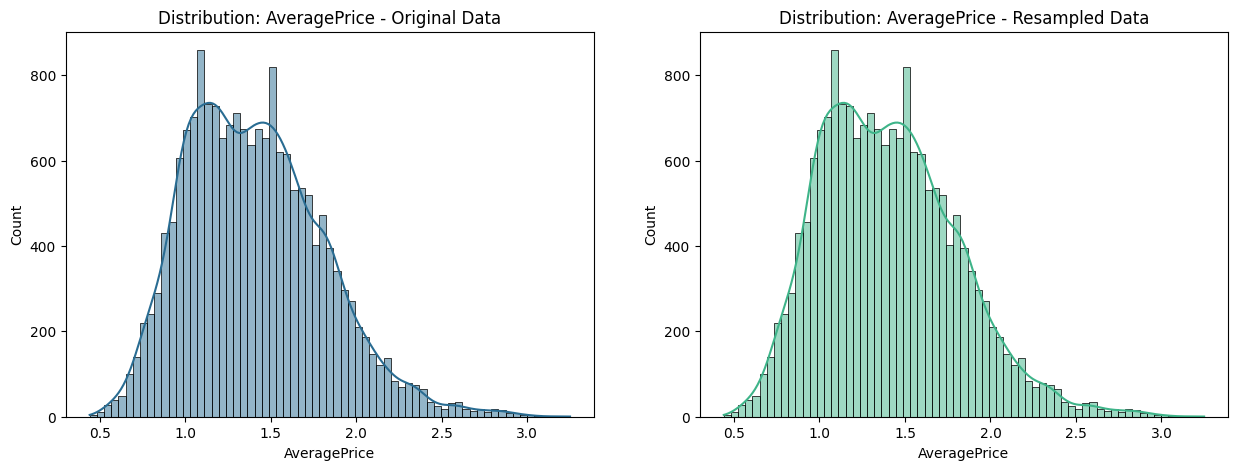

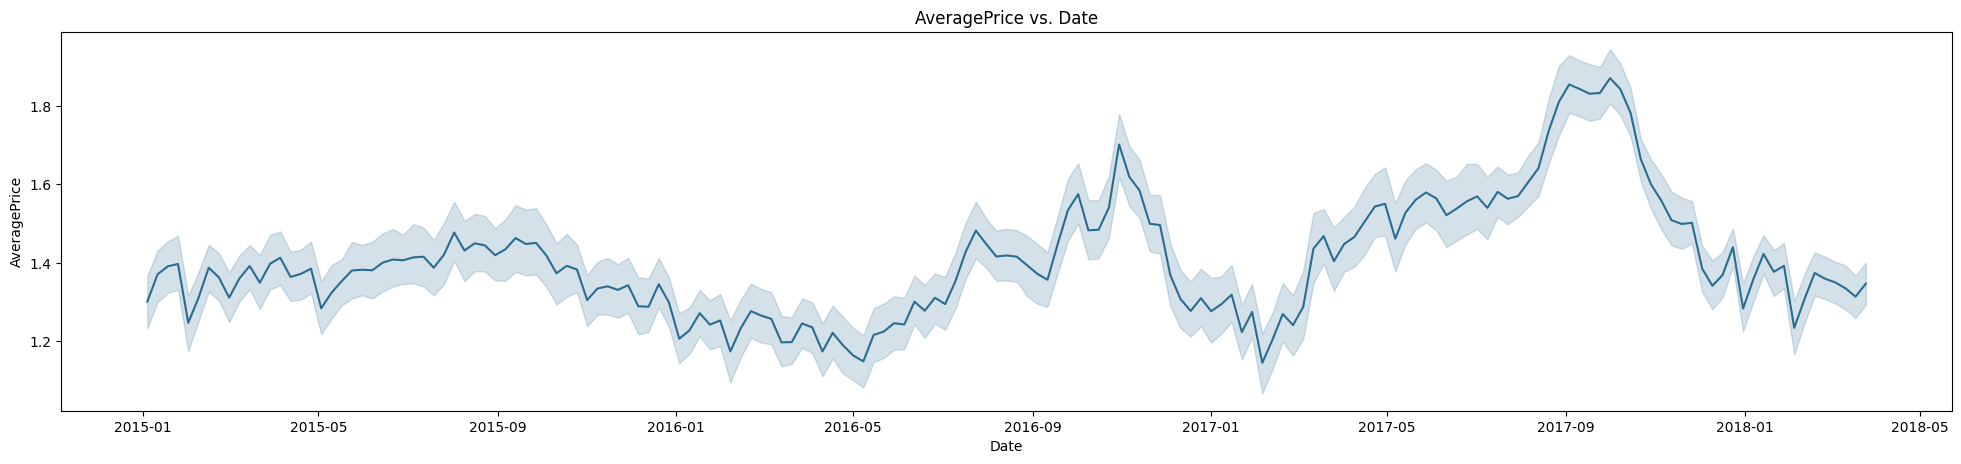

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a deep copy of the DataFrame 'data' and assign it to 'df1'
df1 = data.copy(deep=True)

df1['Date'] = pd.to_datetime(df1['Date'])

# Set the 'Date' column as the index of 'df1'
df1.set_index('Date', inplace=True)

# Define colors
color1 = ['#296C92', '#3EB489']

# Create subplots for histograms
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Distribution of AveragePrice in the original data
sns.histplot(data['AveragePrice'], ax=axes[0], color=color1[0], kde=True)
axes[0].set_title('Distribution: AveragePrice - Original Data')

# Distribution of AveragePrice in the resampled data
sns.histplot(df1['AveragePrice'], ax=axes[1], color=color1[1], kde=True)
axes[1].set_title('Distribution: AveragePrice - Resampled Data')

# Line plot for AveragePrice over time
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(x=df1.index, y='AveragePrice', data=df1, ax=ax, color=color1[0])
ax.set_title('AveragePrice vs. Date')

# Improve layout and show plots
plt.tight_layout(pad=2)
plt.show()


###**Exploratory Data Analysis**

Converting Date into Datetime Format and Resampling the data

In [ ]:

# Create a deep copy of the DataFrame 'data' and assign it to 'df1'
df1 = data.copy(deep=True)

# Convert the 'Date' column in 'df1' to datetime format
df1['Date'] = pd.to_datetime(df1['Date'])

# Set the 'Date' column as the index of 'df1'
df1.set_index('Date', inplace=True)

# Select columns in 'df1' that contain numeric data
numeric_cols = df1.select_dtypes(include=['number']).columns

# Select columns in 'df1' that do not contain numeric data
non_numeric_cols = df1.select_dtypes(exclude=['number']).columns

# Aggregate the numeric columns of 'df1' by resampling them on a monthly basis and calculating the sum and mean for each month
df1_numeric = df1[numeric_cols].resample('M').agg(['sum', 'mean'])

# Select the non-numeric columns of 'df1', resample them on a monthly basis, and retain the first value for each month
df1_non_numeric = df1[non_numeric_cols].resample('M').first()

# Concatenate the numeric and non-numeric DataFrames along the columns axis to create a single DataFrame 'df1_combined'
df1_combined = pd.concat([df1_numeric, df1_non_numeric], axis=1)

# Display the first few rows of 'df1_combined'
df1_combined.head()



,"(Unnamed: 0, sum)","(Unnamed: 0, mean)","(AveragePrice, sum)","(AveragePrice, mean)","(Total Volume, sum)","(Total Volume, mean)","(4046, sum)","(4046, mean)","(4225, sum)","(4225, mean)",...,"(Small Bags, sum)","(Small Bags, mean)","(Large Bags, sum)","(Large Bags, mean)","(XLarge Bags, sum)","(XLarge Bags, mean)","(year, sum)","(year, mean)",type,region
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-31,21380,49.490741,589.70,1.365046,3.180852e+08,736308.355532,1.282303e+08,296829.313565,1.302506e+08,301506.093912,...,41689116.38,96502.584213,8861889.95,20513.634144,138691.73,321.045671,870480,2015.0,conventional,Albany
2015-02-28,19652,45.490741,573.24,1.326944,3.626376e+08,839438.887106,1.531665e+08,354552.080000,1.443357e+08,334110.463727,...,45794082.97,106004.821690,8647564.58,20017.510602,230393.66,533.318657,870480,2015.0,conventional,Albany
2015-03-31,22135,40.990741,735.47,1.361981,4.185831e+08,775153.832907,1.753005e+08,324630.507778,1.619093e+08,299831.998981,...,59178317.47,109589.476796,9355792.71,17325.542056,381985.88,707.381259,1088100,2015.0,conventional,Albany
2015-04-30,15764,36.490741,597.65,1.383449,3.441444e+08,796630.544329,1.505813e+08,348567.729491,1.257769e+08,291150.142593,...,49399854.97,114351.516134,8629941.42,19976.716250,228233.99,528.319421,870480,2015.0,conventional,Albany
2015-05-31,17275,31.990741,726.13,1.344685,4.837840e+08,895896.379241,2.132372e+08,394883.681407,1.785578e+08,330662.679722,...,66695743.66,123510.636407,12077201.63,22365.188204,297414.00,550.766667,1088100,2015.0,conventional,Albany


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# # Set the 'Date' column as the index of 'df1'
# df1.set_index('Date', inplace=True)

# Separate numeric and non-numeric columns
numeric_cols = df1.select_dtypes(include=['number']).columns
non_numeric_cols = df1.select_dtypes(exclude=['number']).columns

# Apply resampling only to numeric columns and calculate sum and mean
df1_numeric = df1[numeric_cols].resample('M').agg(['sum', 'mean'])

# You can take the first of non-numeric columns if necessary
# This line is just a placeholder, adjust the aggregation for non-numeric columns as needed
df1_non_numeric = df1[non_numeric_cols].resample('M').first()

# Recombine the dataframes if needed
df1 = pd.concat([df1_numeric, df1_non_numeric], axis=1)

# Data snapshot before resampling
original_snapshot = data[['AveragePrice', 'Total Volume']].head(10)

# Statistical summary before resampling
original_stats = data['AveragePrice'].describe()

# Adjusting the way to access resampled data
# Make sure to only access the numeric columns after resampling
resampled_snapshot = df1_numeric.loc[:, ('AveragePrice', 'mean')].head(2)
resampled_stats = df1_numeric.loc[:, ('AveragePrice', 'mean')].describe()

print(original_snapshot)
print(original_stats)
print(resampled_snapshot)
print(resampled_stats)


   AveragePrice  Total Volume
0          1.33      64236.62
1          1.35      54876.98
2          0.93     118220.22
3          1.08      78992.15
4          1.28      51039.60
5          1.26      55979.78
6          0.99      83453.76
7          0.98     109428.33
8          1.02      99811.42
9          1.07      74338.76
count    18249.000000
mean         1.405978
std          0.402677
min          0.440000
25%          1.100000
50%          1.370000
75%          1.660000
max          3.250000
Name: AveragePrice, dtype: float64
Date
2015-01-31    1.365046
2015-02-28    1.326944
Freq: M, Name: (AveragePrice, mean), dtype: float64
count    39.000000
mean      1.405581
std       0.146723
min       1.199722
25%       1.317350
50%       1.387431
75%       1.475877
max       1.840949
Name: (AveragePrice, mean), dtype: float64


In [ ]:
# 1. Data Snapshot: Comparing the first few entries before resampling
original_snapshot = data[['AveragePrice', 'Total Volume']].head(10)

# 2. Statistical Summary: 'AveragePrice' before resampling
original_stats = data['AveragePrice'].describe()


resampled_snapshot = df1.head(2)  # First two months
resampled_stats = df1['AveragePrice', 'mean'].describe()

original_snapshot, original_stats, resampled_snapshot, resampled_stats


(   AveragePrice  Total Volume
 0          1.33      64236.62
 1          1.35      54876.98
 2          0.93     118220.22
 3          1.08      78992.15
 4          1.28      51039.60
 5          1.26      55979.78
 6          0.99      83453.76
 7          0.98     109428.33
 8          1.02      99811.42
 9          1.07      74338.76,
 count    18249.000000
 mean         1.405978
 std          0.402677
 min          0.440000
 25%          1.100000
 50%          1.370000
 75%          1.660000
 max          3.250000
 Name: AveragePrice, dtype: float64,
             (Unnamed: 0, sum)  (Unnamed: 0, mean)  (AveragePrice, sum)  \
 Date                                                                     
 2015-01-31              21380           49.490741               589.70   
 2015-02-28              19652           45.490741               573.24   
 
             (AveragePrice, mean)  (Total Volume, sum)  (Total Volume, mean)  \
 Date                                                  

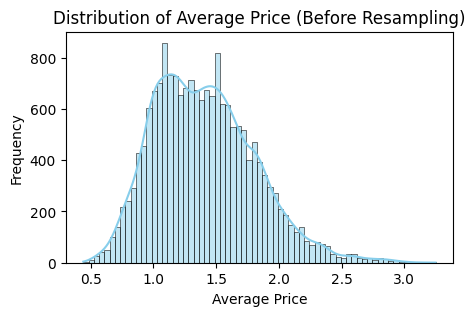

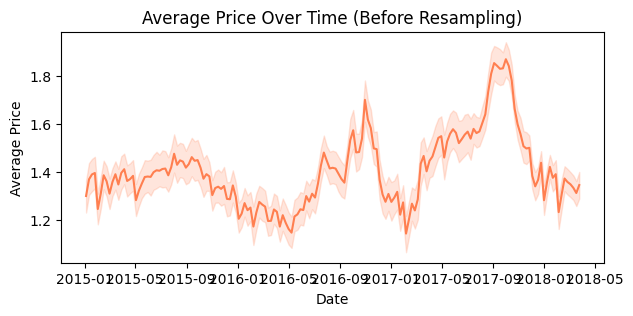

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the 'Date' column as datetime type and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Visualization 1: Distribution of 'AveragePrice'
plt.figure(figsize=(5,3))
sns.histplot(data['AveragePrice'], kde=True, color="skyblue")
plt.title('Distribution of Average Price (Before Resampling)')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.show()

# Visualization 2: Time Series of 'AveragePrice' Over Time
plt.figure(figsize=(7,3))
sns.lineplot(data=data, x=data.index, y='AveragePrice', color="coral")
plt.title('Average Price Over Time (Before Resampling)')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.show()


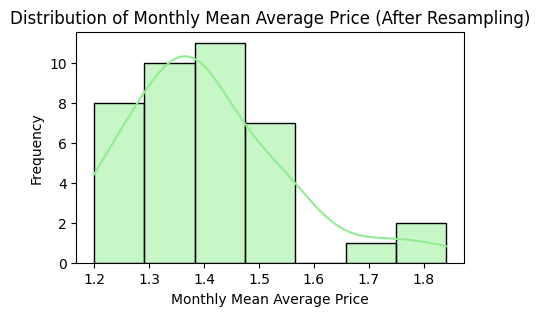

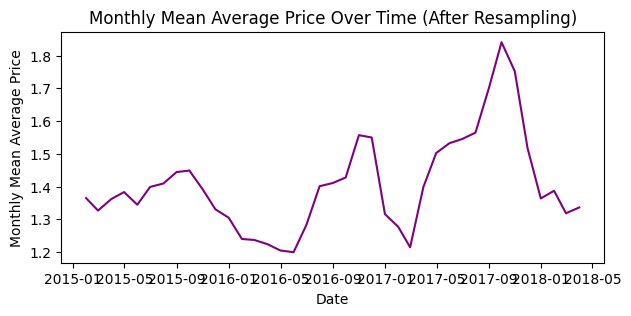

In [ ]:
# Resampling the data by month and calculating sum and mean for each month
df_resampled = data.resample('M').agg({'AveragePrice': ['mean', 'sum']})

# Visualization 3: Distribution of the monthly mean 'AveragePrice'
plt.figure(figsize=(5,3))
sns.histplot(df_resampled[('AveragePrice', 'mean')], kde=True, color="lightgreen")
plt.title('Distribution of Monthly Mean Average Price (After Resampling)')
plt.xlabel('Monthly Mean Average Price')
plt.ylabel('Frequency')
plt.show()

# Visualization 4: Time Series of the monthly mean 'AveragePrice' Over Time
plt.figure(figsize=(7,3))
sns.lineplot(data=df_resampled, x=df_resampled.index, y=('AveragePrice', 'mean'), color="purple")
plt.title('Monthly Mean Average Price Over Time (After Resampling)')
plt.xlabel('Date')
plt.ylabel('Monthly Mean Average Price')
plt.show()


1) Distribution of AveragePrice that is not resampled is pretty much a normally
distributed curve. It highlights small double peaks but we will allow it in this case.

2) Distribution of AveragePrice of the resampled data displays a much better normally distribution curve.

3) We can clearly observe a positive trend in AveragePrice w.r.t Date. Repetitive 3 peaks at consistent intervals of time can be observed.

4) AveragePrice drops around the months of December / January and rises to it's highest value for the months September - November.




**Distribution with respect to Categorical & Numerical**

In [ ]:
col = list(data.columns)  # This will not include the index if 'Date' is set as the index

categorical_features = []
numerical_features = []

for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

# Remove 'Date', 'AveragePrice', and 'region' from numerical_features if they exist
for feature in ['Date', 'AveragePrice', 'region']:
    if feature in numerical_features:
        numerical_features.remove(feature)

print('Categorical Features:', *categorical_features)
print('Numerical Features:', *numerical_features)


Categorical Features: type year
Numerical Features: Unnamed: 0 Total Volume 4046 4225 4770 Total Bags Small Bags Large Bags XLarge Bags


1) We remove the Date from the list of numerical_features as it's datatype is supposed to be datetime.

2) AveragePrice and region are removed as we will visualize them separately from the numerical features.

**Distribution of Categorical Features :**


In [ ]:
# Import the LabelEncoder class from the sklearn.preprocessing module
from sklearn.preprocessing import LabelEncoder

# Instantiate a LabelEncoder object
le = LabelEncoder()

# Encode the 'type' column in the 'data' DataFrame and replace it with the encoded values
data['type'] = le.fit_transform(data['type'])


<ipython-input-88-d38239bd05c0>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[categorical_features[i]], kde_kws={'bw': 1})
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-88-d38239bd05c0>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use e

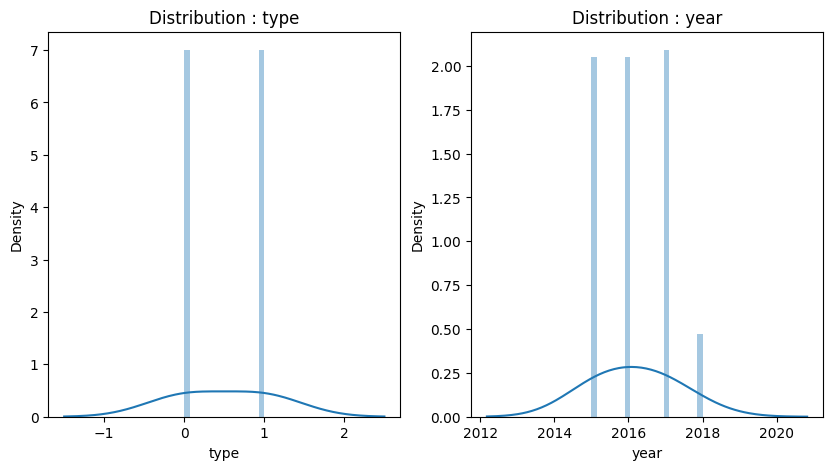

In [ ]:
# Create a figure and a set of subplots with one row and two columns, with a specified size
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Loop through each categorical feature
for i in range(len(categorical_features)):

    # Select the subplot at position (1, i+1)
    plt.subplot(1, 2, i+1)

    # Plot the distribution of the ith categorical feature using seaborn's distplot function
    sns.distplot(data[categorical_features[i]], kde_kws={'bw': 1})

    # Set the title of the subplot
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)



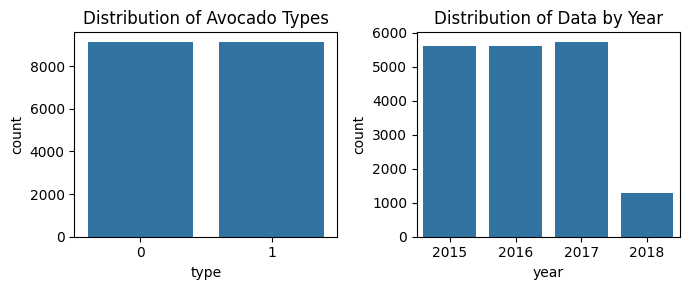

In [ ]:
# Create a new figure with a specific size
plt.figure(figsize=(7, 3))

# Create the first subplot in a grid of 1 row and 2 columns, and set the current subplot to the first one
plt.subplot(1, 2, 1)

# Plot the count of occurrences of each type of avocado in the 'type' column using seaborn's countplot
sns.countplot(x=data['type'])

# Set the title for the first subplot
plt.title('Distribution of Avocado Types')

# Create the second subplot in the same grid, and set the current subplot to the second one
plt.subplot(1, 2, 2)

# Plot the count of occurrences of each year in the 'year' column using seaborn's countplot
sns.countplot(x=data['year'])

# Set the title for the second subplot
plt.title('Distribution of Data by Year')

# Adjust the layout of the subplots to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


1) Both the features are Normally Distributed.

2) Conventional and Organic type of Avocados are present in equal numbers.

3) Similarly, data points are pretty much same for year values 2015, 2016, 2017 and it is followed by a very sharp drop in 2018 probably because of no further data in 2018.

**Categorical Features vs Target Variable (AveragePrice) :**


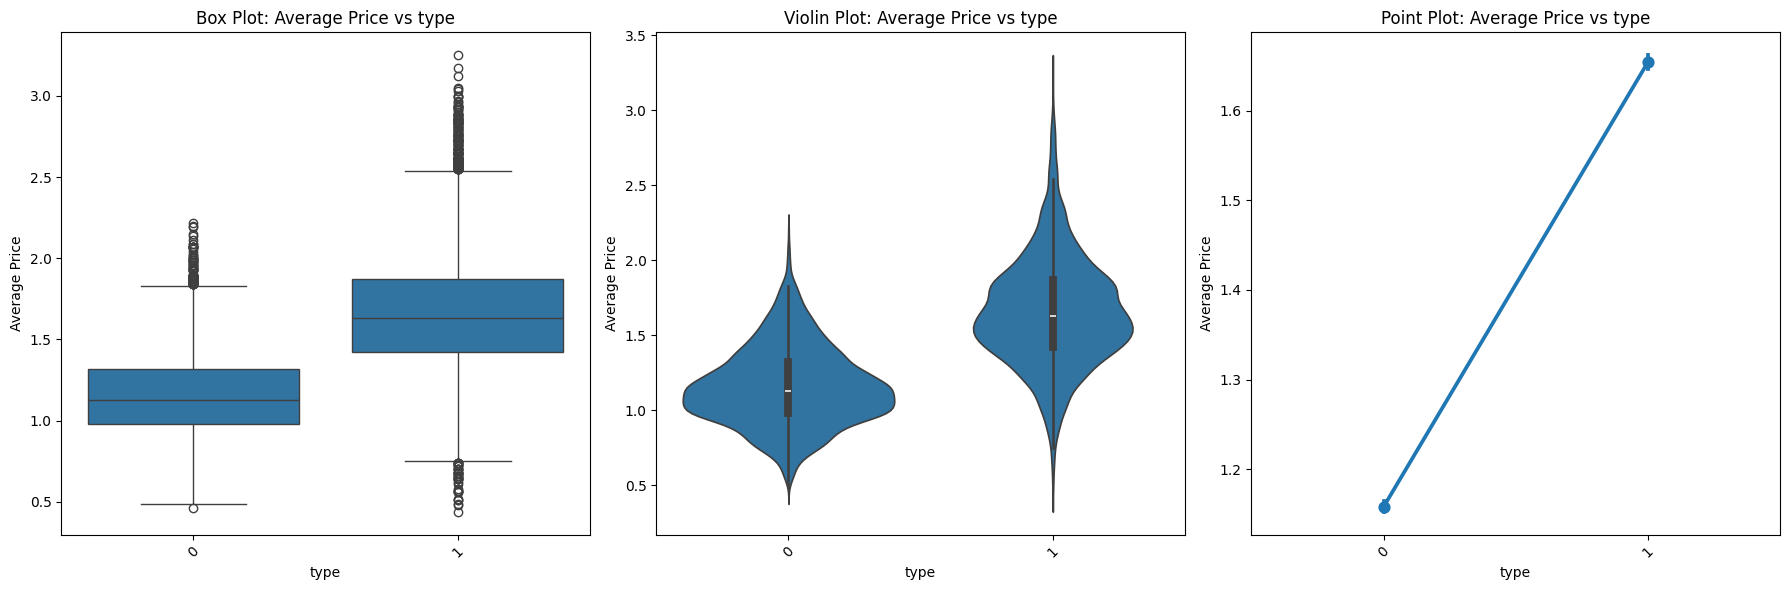

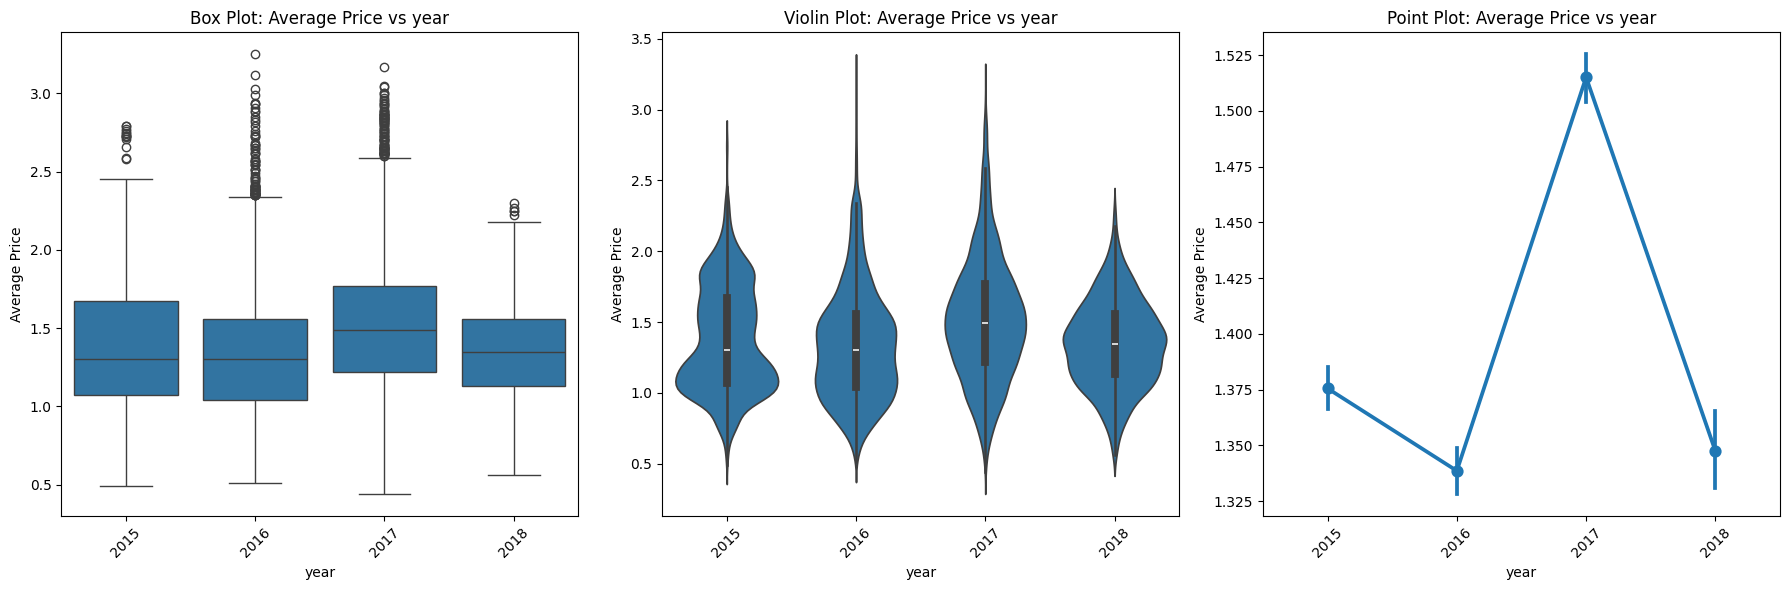

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in categorical_features:
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    # Box Plot
    sns.boxplot(x=feature, y='AveragePrice', data=data, ax=ax[0])
    ax[0].set_title(f'Box Plot: Average Price vs {feature}')
    ax[0].set_xlabel(feature)
    ax[0].set_ylabel('Average Price')
    ax[0].tick_params(axis='x', rotation=45)

    # Violin Plot
    sns.violinplot(x=feature, y='AveragePrice', data=data, ax=ax[1])
    ax[1].set_title(f'Violin Plot: Average Price vs {feature}')
    ax[1].set_xlabel(feature)
    ax[1].set_ylabel('Average Price')
    ax[1].tick_params(axis='x', rotation=45)

    # Point Plot
    sns.pointplot(x=feature, y='AveragePrice', data=data, ax=ax[2])
    ax[2].set_title(f'Point Plot: Average Price vs {feature}')
    ax[2].set_xlabel(feature)
    ax[2].set_ylabel('Average Price')
    ax[2].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()


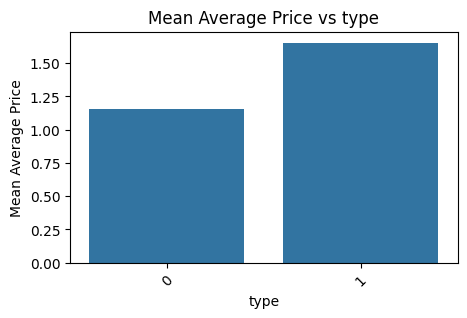

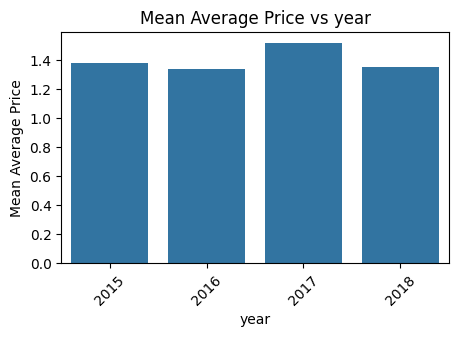

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


for feature in categorical_features:
    # Calculate mean 'AveragePrice' for each category
    category_means = data.groupby(feature)['AveragePrice'].mean().reset_index()

    plt.figure(figsize=(5,3))
    sns.barplot(x=feature, y='AveragePrice', data=category_means)
    plt.title(f'Mean Average Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Mean Average Price')
    plt.xticks(rotation=45)
    plt.show()


1)AveragePrice of Conventional(0) avocados is less than those of Organic(1).

2) AveragePrice of Avocados is near about the same for the years 2015, 2016 and 2018. A rise in AveragePrice can be clearly seen for the year 2017.

**Distribution of Numerical Features :**

In [ ]:
print(df1.columns)


Index([   ('Unnamed: 0', 'sum'),   ('Unnamed: 0', 'mean'),
        ('AveragePrice', 'sum'), ('AveragePrice', 'mean'),
        ('Total Volume', 'sum'), ('Total Volume', 'mean'),
                ('4046', 'sum'),         ('4046', 'mean'),
                ('4225', 'sum'),         ('4225', 'mean'),
                ('4770', 'sum'),         ('4770', 'mean'),
          ('Total Bags', 'sum'),   ('Total Bags', 'mean'),
          ('Small Bags', 'sum'),   ('Small Bags', 'mean'),
          ('Large Bags', 'sum'),   ('Large Bags', 'mean'),
         ('XLarge Bags', 'sum'),  ('XLarge Bags', 'mean'),
                ('year', 'sum'),         ('year', 'mean'),
                         'type',                 'region'],
      dtype='object')


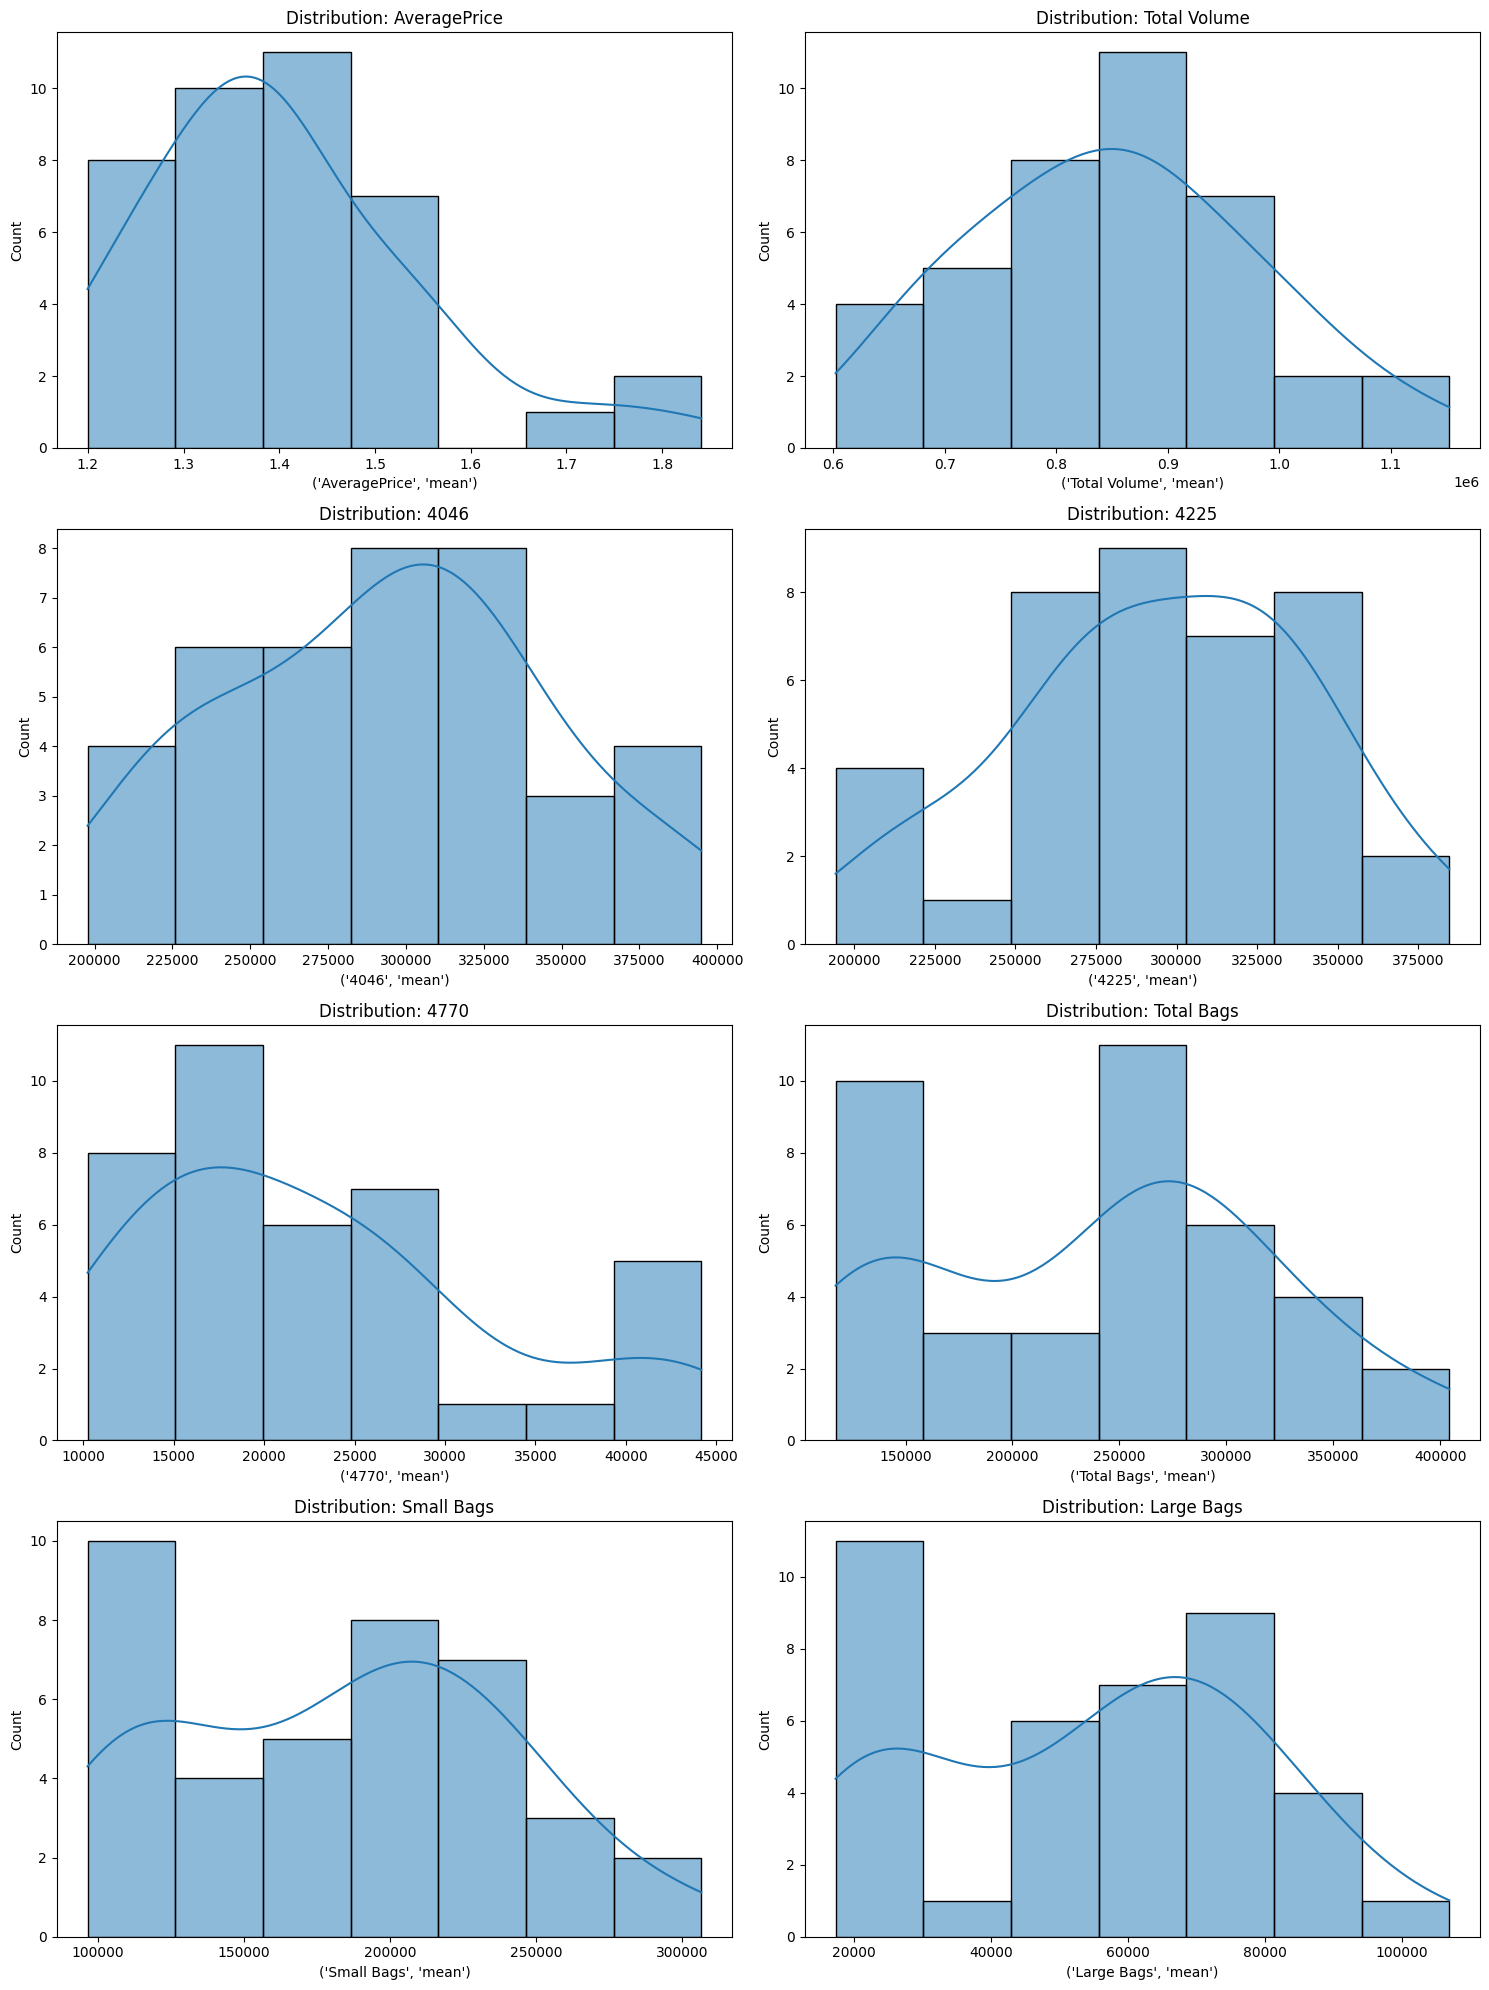

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust layout before plotting

# Exclude 'Unnamed: 0' and 'year', and also 'type' and 'region' since they are not numerical features
numerical_features = [col for col in df1.columns if col[0] not in ['Unnamed: 0', 'year', 'type', 'region']]

# Plot only the 'mean' values to avoid doubling up on 'sum' and 'mean' plots
numerical_features_means = [col for col in numerical_features if col[1] == 'mean']

# Ensure we only iterate over the number of available subplots
num_plots = min(len(numerical_features_means), 4*2)

for i in range(num_plots):
    feature = numerical_features_means[i]
    row, col = divmod(i, 2)
    sns.histplot(df1[feature], ax=axes[row][col], kde=True)
    axes[row][col].set_title('Distribution: ' + feature[0])

# If there are more features than subplots, we need to hide the extra subplots
for j in range(num_plots, 4*2):
    axes.flatten()[j].set_visible(False)

fig.tight_layout()
plt.show()


Distributions of the non-resampled data were understandable, hence we visulize the distributions of resampled data.

Total Volume, 4046 & 4225 kind of display a normally distributed curve. Remaining numerical features display either a Double Peak Distribution or Right / Positive Skewed Distribution.

**Numerical Features vs Categorical Features :**


Numerical Features vs type :


In [ ]:
total_volume = [sum(data[data['type'] == 0]['Total Volume']) / sum(data['Total Volume']) * 100,
                sum(data[data['type'] == 1]['Total Volume']) / sum(data['Total Volume']) * 100]

avocado_4046 = [sum(data[data['type'] == 0]['4046']) / sum(data['4046']) * 100,
                sum(data[data['type'] == 1]['4046']) / sum(data['4046']) * 100]

avocado_4225 = [sum(data[data['type'] == 0]['4225']) / sum(data['4225']) * 100,
                sum(data[data['type'] == 1]['4225']) / sum(data['4225']) * 100]

avocado_4770 = [sum(data[data['type'] == 0]['4770']) / sum(data['4770']) * 100,
                sum(data[data['type'] == 1]['4770']) / sum(data['4770']) * 100]

total_bags = [sum(data[data['type'] == 0]['Total Bags']) / sum(data['Total Bags']) * 100,
              sum(data[data['type'] == 1]['Total Bags']) / sum(data['Total Bags']) * 100]

small_bags = [sum(data[data['type'] == 0]['Small Bags']) / sum(data['Small Bags']) * 100,
              sum(data[data['type'] == 1]['Small Bags']) / sum(data['Small Bags']) * 100]

large_bags = [sum(data[data['type'] == 0]['Large Bags']) / sum(data['Large Bags']) * 100,
              sum(data[data['type'] == 1]['Large Bags']) / sum(data['Large Bags']) * 100]

xlarge_bags = [sum(data[data['type'] == 0]['XLarge Bags']) / sum(data['XLarge Bags']) * 100,
               sum(data[data['type'] == 1]['XLarge Bags']) / sum(data['XLarge Bags']) * 100]

type_numerical_features_percentage = [total_volume,avocado_4046,avocado_4225,avocado_4770,
                          total_bags,small_bags,large_bags,xlarge_bags]

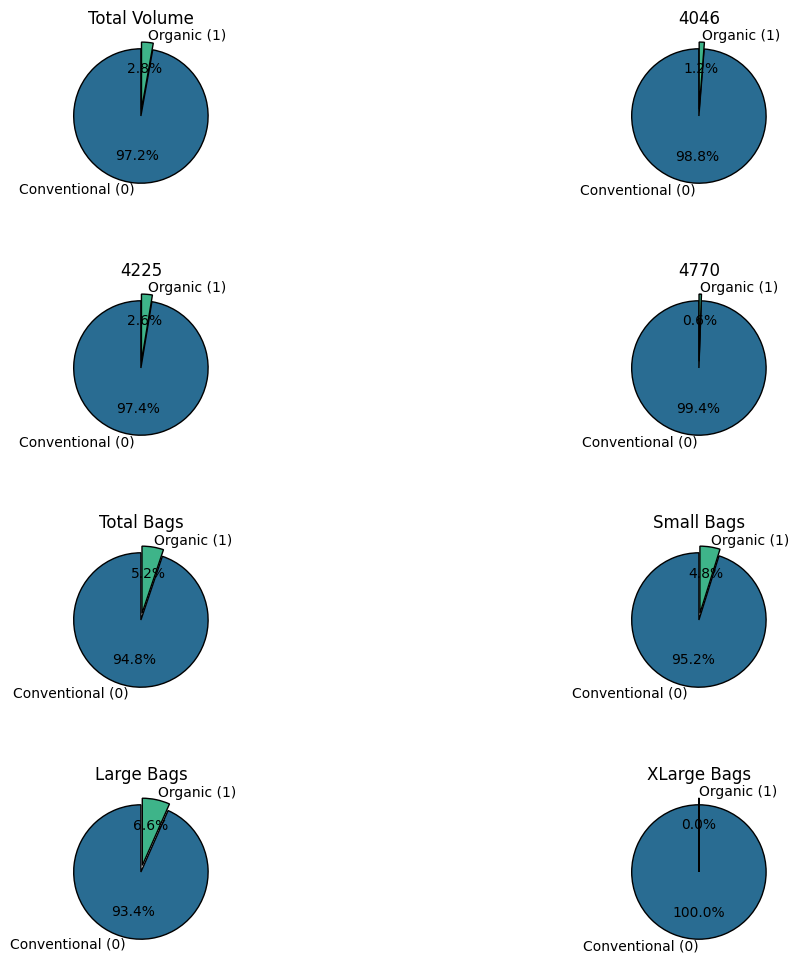

In [ ]:
import matplotlib.pyplot as plt

# Define the colors for the pie charts
color1 = ['#296C92', '#3EB489']


num_subplots = len(type_numerical_features_percentage)  # Define the number of subplots based on the data
numerical_features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']  # Adjust as necessary

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i in range(num_subplots):
    ax = axes[i // 2, i % 2]  # Locate the correct subplot
    ax.pie(type_numerical_features_percentage[i], labels=['Conventional (0)', 'Organic (1)'], autopct='%1.1f%%',
           startangle=90, explode=(0, 0.1), colors=color1,
           wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
    ax.set_title(numerical_features[i])

# If the number of numerical features is not an even multiple of the number of subplots,
# the following code will hide any extra subplots.
for j in range(num_subplots, 4 * 2):
    axes.flatten()[j].set_visible(False)

plt.show()


Use of Conventional avocados dominates the use of Organic avocados by a huge margin for all the features.


**Numerical Features vs year :**

In [ ]:
total_volume = [sum(data[data['year'] == 2015]['Total Volume']) / sum(data['Total Volume']) * 100,
                sum(data[data['year'] == 2016]['Total Volume']) / sum(data['Total Volume']) * 100,
                sum(data[data['year'] == 2017]['Total Volume']) / sum(data['Total Volume']) * 100,
                sum(data[data['year'] == 2018]['Total Volume']) / sum(data['Total Volume']) * 100]

avocado_4046 = [sum(data[data['year'] == 2015]['4046']) / sum(data['4046']) * 100,
                sum(data[data['year'] == 2016]['4046']) / sum(data['4046']) * 100,
                sum(data[data['year'] == 2017]['4046']) / sum(data['4046']) * 100,
                sum(data[data['year'] == 2018]['4046']) / sum(data['4046']) * 100]

avocado_4225 = [sum(data[data['year'] == 2015]['4225']) / sum(data['4225']) * 100,
                sum(data[data['year'] == 2016]['4225']) / sum(data['4225']) * 100,
                sum(data[data['year'] == 2017]['4225']) / sum(data['4225']) * 100,
                sum(data[data['year'] == 2018]['4225']) / sum(data['4225']) * 100]

avocado_4770 = [sum(data[data['year'] == 2015]['4770']) / sum(data['4770']) * 100,
                sum(data[data['year'] == 2016]['4770']) / sum(data['4770']) * 100,
                sum(data[data['year'] == 2017]['4770']) / sum(data['4770']) * 100,
                sum(data[data['year'] == 2018]['4770']) / sum(data['4770']) * 100]

total_bags = [sum(data[data['year'] == 2015]['Total Bags']) / sum(data['Total Bags']) * 100,
              sum(data[data['year'] == 2016]['Total Bags']) / sum(data['Total Bags']) * 100,
              sum(data[data['year'] == 2017]['Total Bags']) / sum(data['Total Bags']) * 100,
              sum(data[data['year'] == 2018]['Total Bags']) / sum(data['Total Bags']) * 100]

small_bags = [sum(data[data['year'] == 2015]['Small Bags']) / sum(data['Small Bags']) * 100,
              sum(data[data['year'] == 2016]['Small Bags']) / sum(data['Small Bags']) * 100,
              sum(data[data['year'] == 2017]['Small Bags']) / sum(data['Small Bags']) * 100,
              sum(data[data['year'] == 2018]['Small Bags']) / sum(data['Small Bags']) * 100]
large_bags = [sum(data[data['year'] == 2015]['Large Bags']) / sum(data['Large Bags']) * 100,
              sum(data[data['year'] == 2016]['Large Bags']) / sum(data['Large Bags']) * 100,
              sum(data[data['year'] == 2017]['Large Bags']) / sum(data['Large Bags']) * 100,
              sum(data[data['year'] == 2018]['Large Bags']) / sum(data['Large Bags']) * 100]

xlarge_bags = [sum(data[data['year'] == 2015]['XLarge Bags']) / sum(data['XLarge Bags']) * 100,
               sum(data[data['year'] == 2016]['XLarge Bags']) / sum(data['XLarge Bags']) * 100,
               sum(data[data['year'] == 2017]['XLarge Bags']) / sum(data['XLarge Bags']) * 100,
               sum(data[data['year'] == 2018]['XLarge Bags']) / sum(data['XLarge Bags']) * 100]

year_numerical_features_percentage = [total_volume,avocado_4046,avocado_4225,avocado_4770,
                                      total_bags,small_bags,large_bags,xlarge_bags]

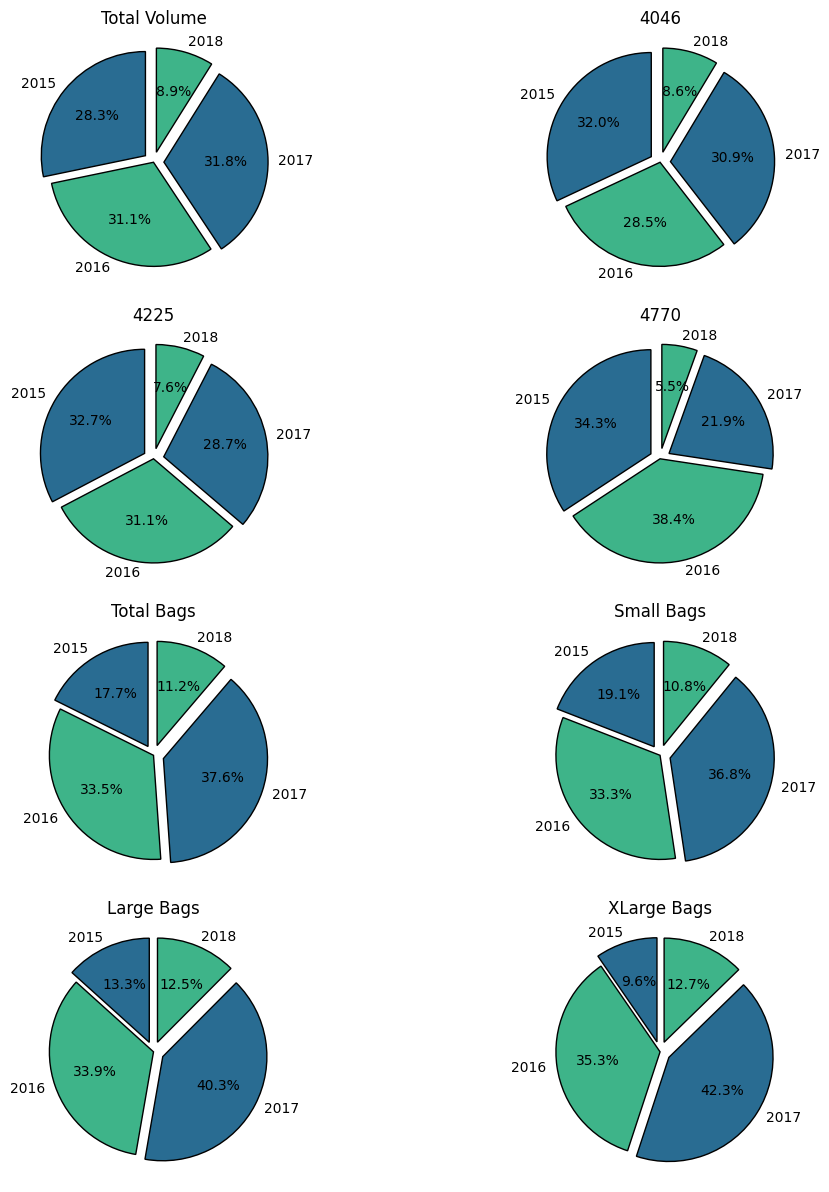

In [ ]:
fig, ax = plt.subplots(nrows = 4,ncols = 2,figsize = (12,12))

for i in range(len(numerical_features)):
    plt.subplot(4,2,i + 1)
    plt.pie(year_numerical_features_percentage[i],labels = ['2015','2016','2017','2018'],autopct = '%1.1f%%',
            startangle = 90, explode = (0.1,0,0.1,0.1), colors = color1,
            wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    title = numerical_features[i]
    plt.title(title);
fig.tight_layout(pad = 1)

The annual total volume of avocado sales has shown an upward trend from 2015 onwards.

The recorded data for 2018 is only for the first quarter, leading to comparatively lower total volume figures for that year.

In 2015, consumption of the three avocado types (4046, 4225, 4770) was roughly equal.

By 2016, a distinct shift in preference emerged, with type 4770 becoming the most popular, chosen by 38.4% of consumers, followed by types 4225 and 4046.

Preferences reversed in 2017, as type 4046 took the lead with 30.9% popularity, while type 4770's preference significantly decreased to 21.9%. Type 4225 also saw a slight average decrease of 1.33% over the three years.
The use of bags for avocados has been consistently increasing since 2015, with a notable average growth margin of 19.07% from 2015 to 2016.

**Numerical Features vs Date :**


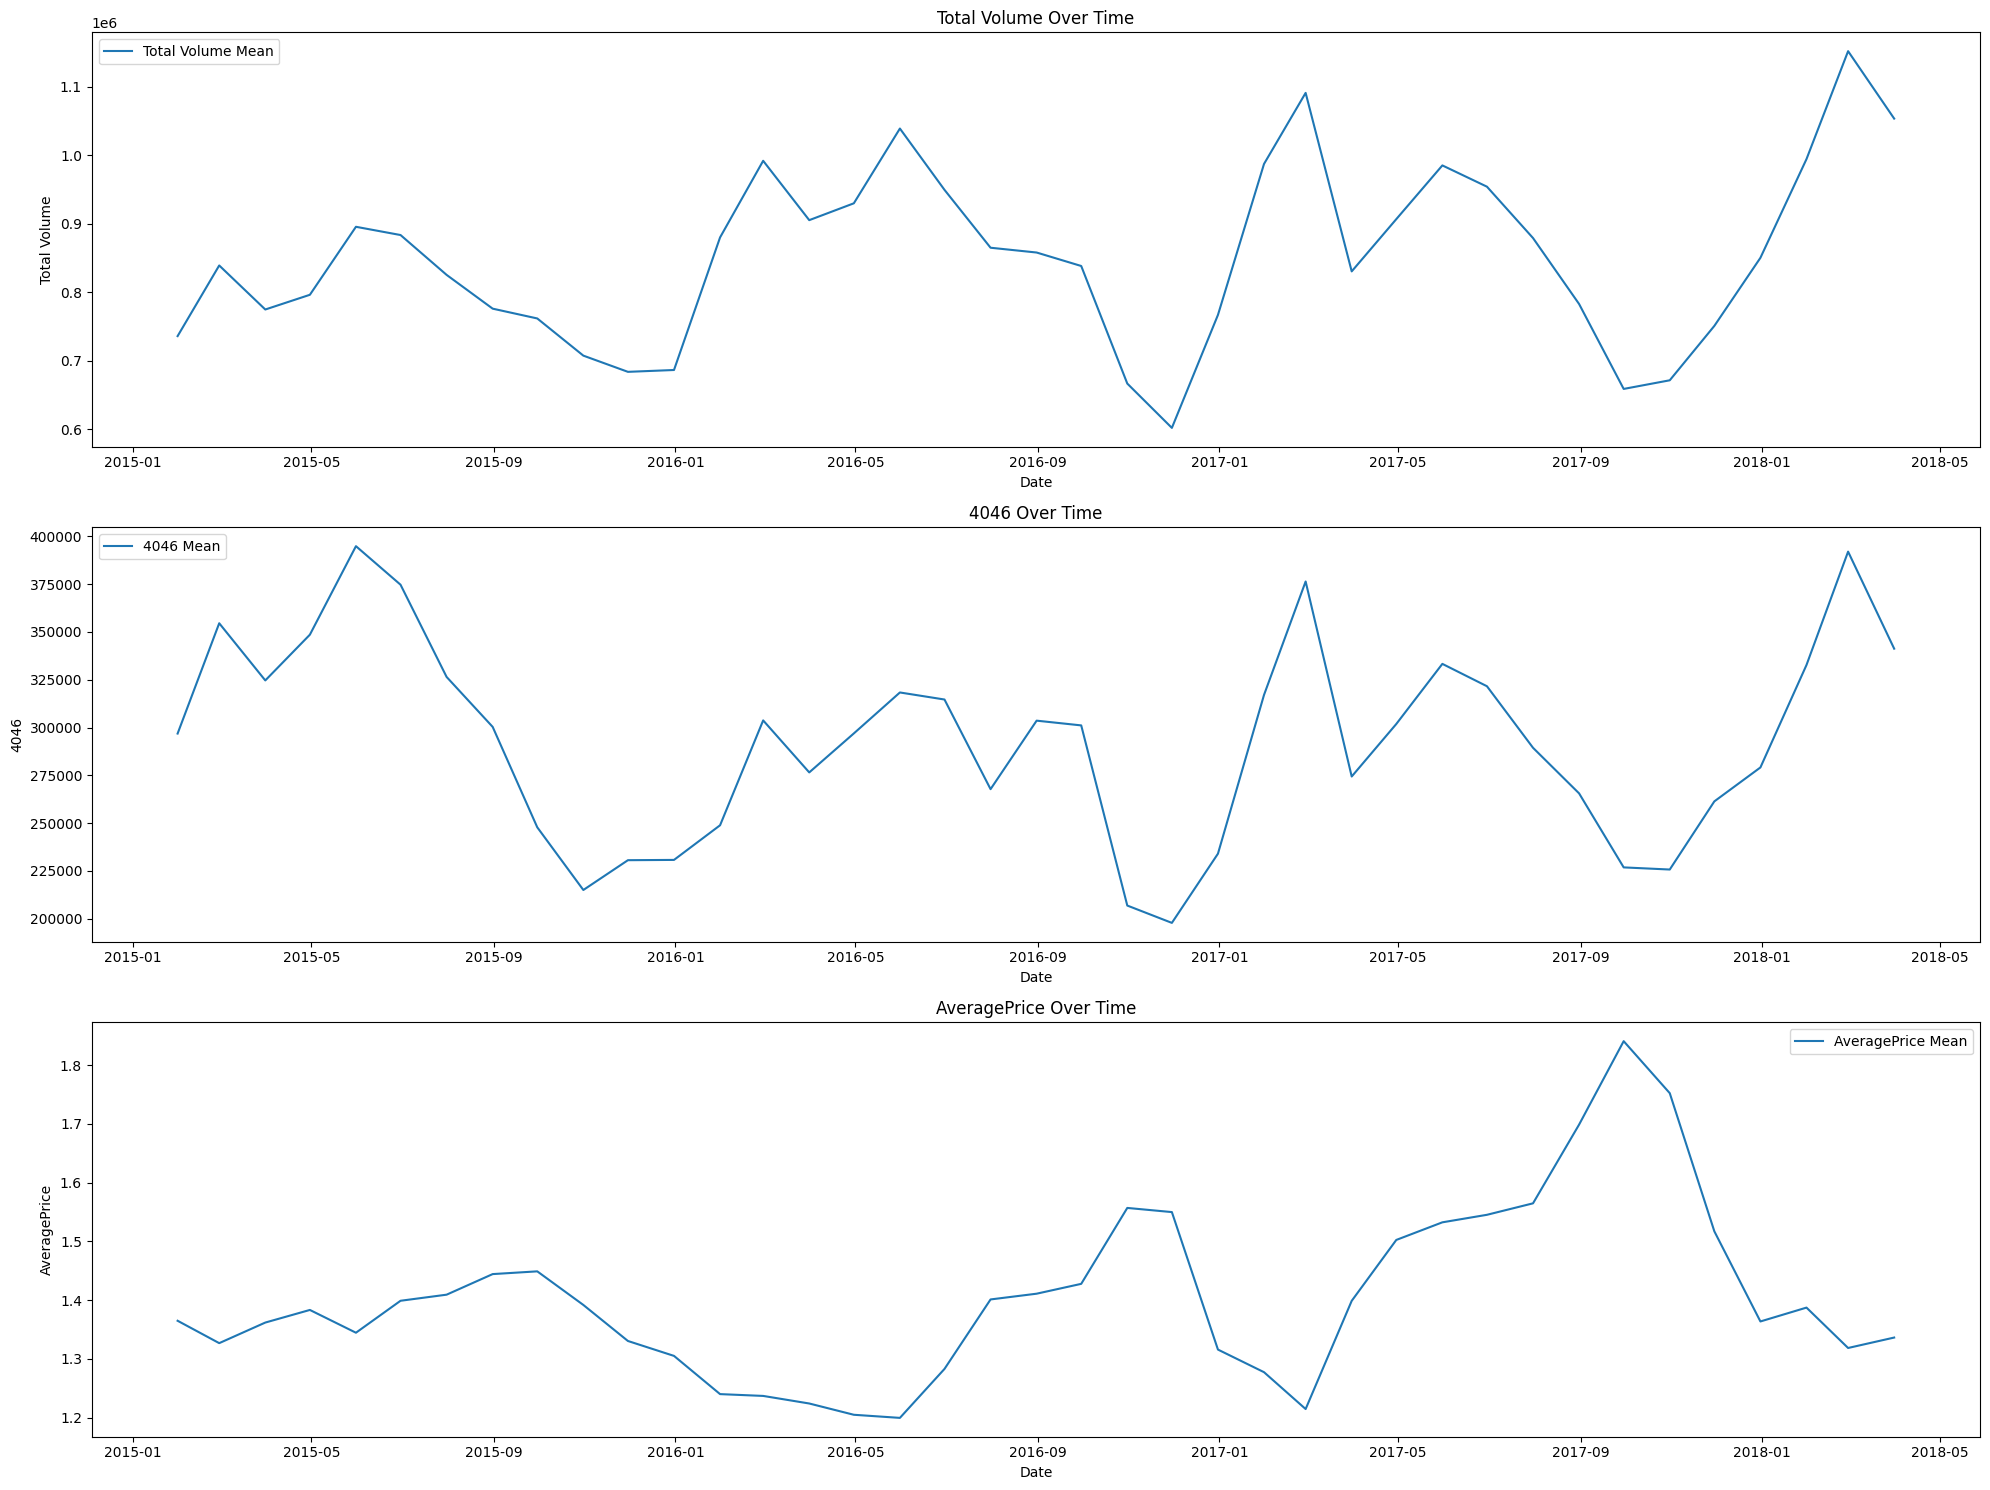

In [ ]:
# Import seaborn and matplotlib.pyplot libraries
import seaborn as sns
import matplotlib.pyplot as plt

# List of tuples containing column names and aggregation functions
l1 = [('Total Volume', 'mean'), ('4046', 'mean'), ('AveragePrice', 'mean')]

# Create a new figure and set of subplots with 3 rows and 1 column, with a specific size
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20, 15))

# Loop through each tuple in the list l1
for i, feature in enumerate(l1):
    # Set the current subplot to the ith subplot in the grid
    plt.subplot(3, 1, i + 1)

    # Plot a line plot of the specified feature from df1, using seaborn's lineplot function
    sns.lineplot(data=df1[feature], label=f"{feature[0]} Mean")

    # Set the title for the subplot
    title = f"{feature[0]} Over Time"
    plt.title(title)

    # Set the x-axis label
    plt.xlabel('Date')

    # Set the y-axis label
    plt.ylabel(feature[0])

    # Add a legend to the subplot
    plt.legend()

# Adjust the layout of the subplots to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


There appears to be an inverse relationship between the Average Price of avocados and both their Total Volume and Total Bags. As one increases, the other tends to decrease, indicating a negative correlation.

Conversely, Total Volume and Total Bags seem to have a direct, positive correlation, moving in tandem with each other over time.

Visualizing these trends on the same graph would likely show the high points of Average Price coinciding with the low points of Total Volume and Total Bags, and vice versa.

The observed patterns align with the principles of supply and demand:

When supply exceeds demand, prices tend to fall.
Conversely, when supply falls short of demand, prices are prone to rise.
Over time, all three variables—Average Price, Total Volume, and Total Bags—exhibit an overall increase.

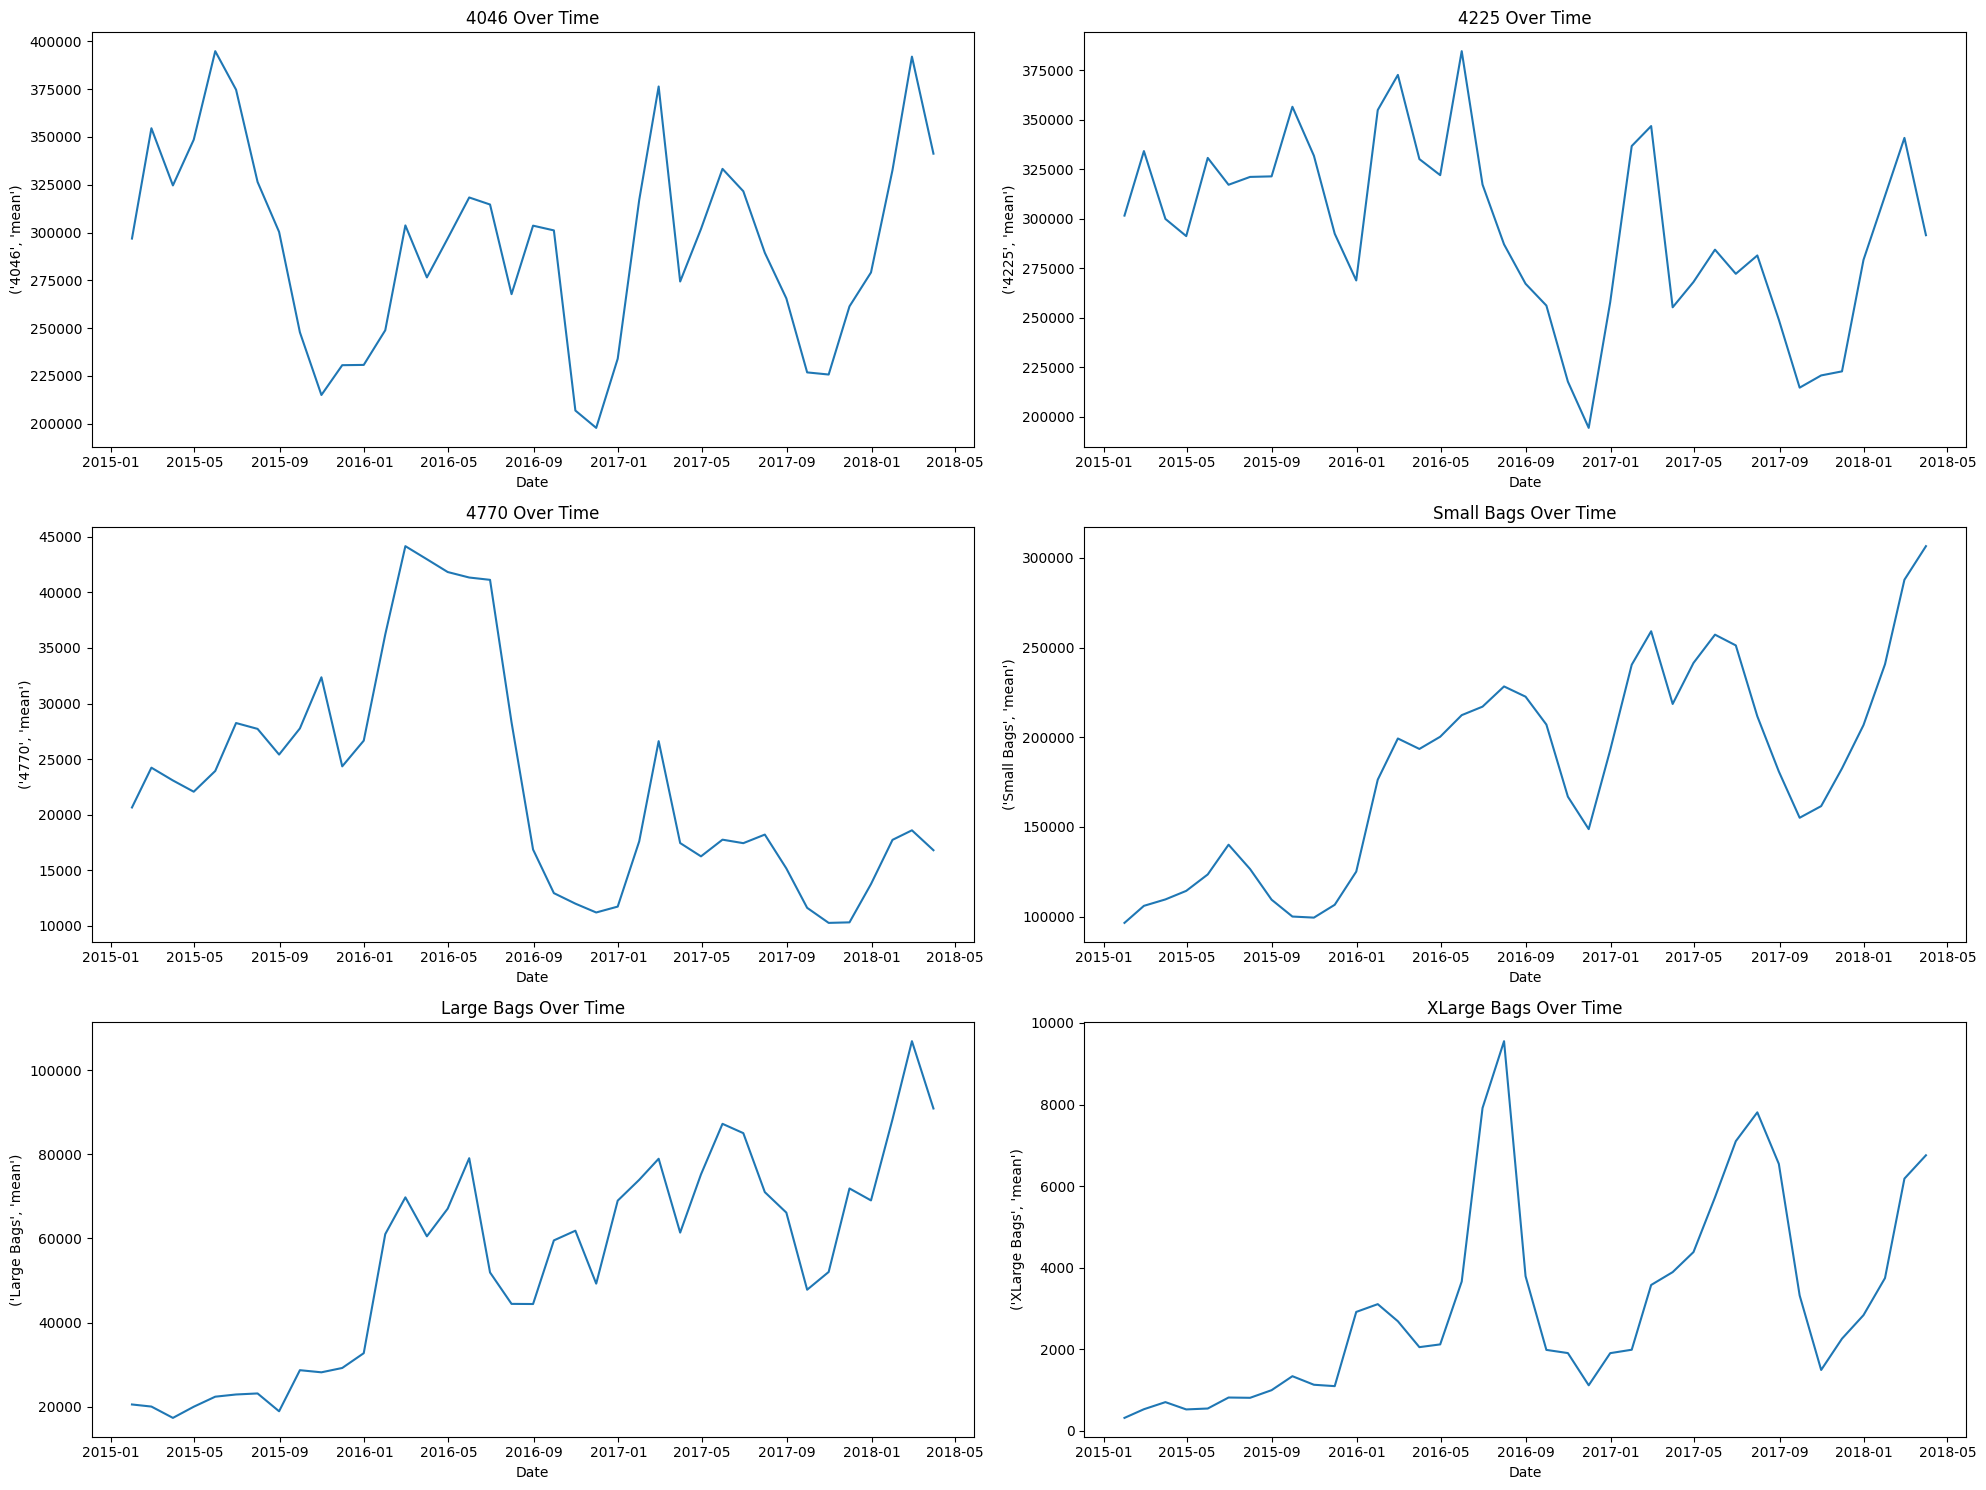

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# list of features to plot
l2 = ['4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags']

# Set up the figure for your subplots
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

# Loop through each feature in l2 to create a line plot
for i, feature in enumerate(l2):
    plt.subplot(3, 2, i+1)
    sns.lineplot(x=df1.index, y=df1[(feature, 'mean')])  # Adjusted for multi-level column
    title = f'{feature} Over Time'
    plt.title(title)

plt.tight_layout()
plt.show()


The consumption patterns for avocados identified by their PLU codes, 4046 and 4225, demonstrate similar trends over time, with their highs and lows closely mirroring each other.

The demand for the 4770 variety of avocados has been on a decline. Notably, there was a significant drop in its consumption towards the end of 2016, from which it hasn't shown signs of recovery.

Regarding the packaging, there's a clear trend showing an increase in the use of bags for avocado purchases. Across all bag types, there is a consistent growth in usage over time. However, the data indicates a strong preference for Small Bags among consumers, as suggested by the higher values observed on the y-axis for this category.

# **Summary of EDA**

The Average Price of avocados typically begins just under $1.20, peaking above $1.80 during high season. This fluctuation is attributed to reduced avocado availability around December/January, leading to price increases, whereas prices tend to drop between September and November due to higher availability.

In comparing avocado types, Conventional avocados (denoted as 0) significantly outsell Organic avocados (denoted as 1). The average price for Conventional avocados hovers just below $1.20, while Organic avocados command prices above $1.60.

The law of supply and demand is evident in the relationship between avocado Average Price and both Total Volume and Total Bags.

A consistent increase in Total Volume of avocados sold is observed starting from 2015. Given the higher volume of purchases, customers show a preference for Conventional avocados, which are cheaper than Organic ones.

The preference for avocado types based on PLU code (4046, 4225, 4770) evolves over the years:

2015: Equal preference among all three types.
2016: Preference for PLU 4770 avocados surpasses the others, with PLU 4225 and 4046 following.
2017: PLU 4046 avocados become the most preferred, followed by 4225 and 4770.
The use of bags for packing avocados shows a positive correlation with the Total Volume sold. As avocado sales volumes increase, so does the utilization of bags, indicating a cause-and-effect relationship.

## **Time Series Analysis**

In [ ]:
print(data.columns)


Index(['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')


In [ ]:
# Since 'Date' is already the index and in the correct format, we can skip straight to resampling.
df1 = data.resample('W').sum()
df1.head()


,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-01-04,5507,140.54,8.467434e+07,33098258.74,36851038.43,2278818.64,12446221.39,9910008.90,2485655.90,50556.59,54,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...
2015-01-11,5399,148.03,7.855581e+07,31024164.99,32808429.84,2349167.45,12374044.96,10352936.42,1977832.00,43276.54,54,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...
2015-01-18,5291,150.24,7.838878e+07,31802706.86,31662041.93,2208250.55,12715784.74,10548854.11,2145586.13,21344.50,54,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...
2015-01-25,5183,150.89,7.646628e+07,32305132.87,28929122.37,2078378.86,13153646.97,10877316.95,2252815.92,23514.10,54,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...
2015-02-01,5075,134.68,1.194532e+08,50292988.96,50696230.48,3687489.31,14776526.50,11576833.65,3073989.39,125703.46,54,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...


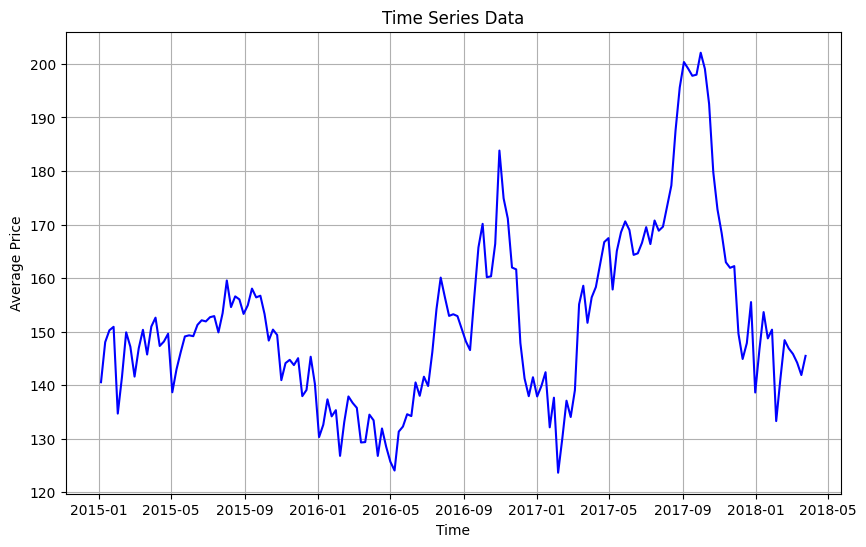

In [ ]:
# Check for data Stationarity

#Test 1: Visual Inspection

plt.figure(figsize=(10, 6))
plt.plot(df1['AveragePrice'], color='blue')
plt.title('Time Series Data')
plt.xlabel('Time')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()


In [ ]:
df1.drop(columns=[col for col in df1.columns if col != 'AveragePrice'], inplace=True)
df1.head()

,AveragePrice
Date,
2015-01-04,140.54
2015-01-11,148.03
2015-01-18,150.24
2015-01-25,150.89
2015-02-01,134.68


In [ ]:
#Test 2: ADF Test

from statsmodels.tsa.stattools import adfuller

result = adfuller(df1['AveragePrice'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

if result[1] <= 0.05:
    print("Reject the null hypothesis. Data is stationary.")
else:
    print("Fail to reject the null hypothesis. Data is non-stationary.")


ADF Statistic: -2.3636450221472285
p-value: 0.15226126304825205
Critical Values:
   1%: -3.4698858990744115
   5%: -2.8789026251889647
   10%: -2.5760266680839004
Fail to reject the null hypothesis. Data is non-stationary.


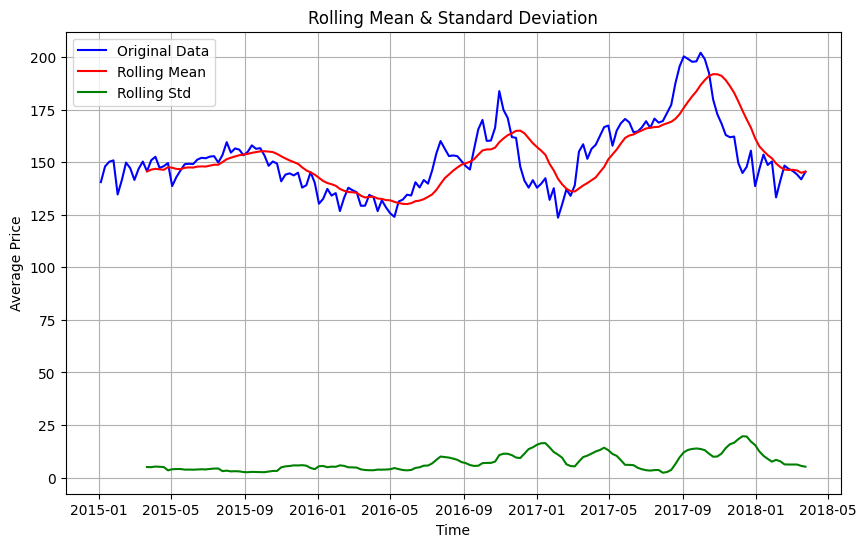

In [ ]:
#Test 3: Rolling Statistics

# Set the window size of 12 months (monthly data) for rolling statistics
window_size = 12

# Compute rolling mean and rolling standard deviation
rolling_mean = df1['AveragePrice'].rolling(window=window_size).mean()
rolling_std = df1['AveragePrice'].rolling(window=window_size).std()

# Plot the original time series data and the rolling statistics
plt.figure(figsize=(10, 6))
plt.plot(df1['AveragePrice'], color='blue', label='Original Data')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='green', label='Rolling Std')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Time')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()


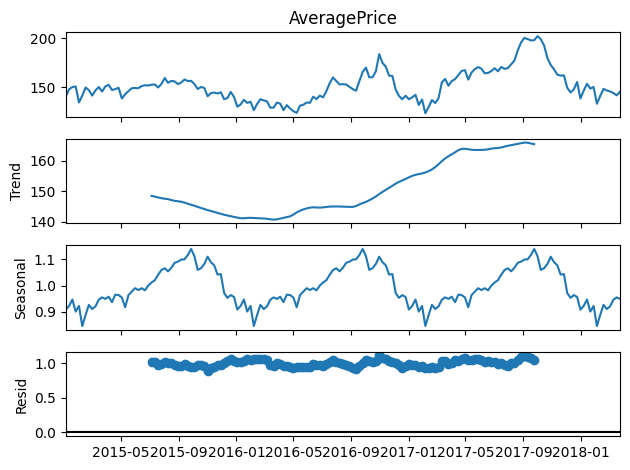

In [ ]:
# Import necessary libraries
import statsmodels.api as sm
import statsmodels.tsa.api as smt

# Perform seasonal decomposition on the 'AveragePrice' column of df1 using a multiplicative model
result = sm.tsa.seasonal_decompose(df1['AveragePrice'], model='multiplicative')

# Plot the decomposition results
result.plot()

# Display the plot
plt.show()


In [ ]:
# Comment
# The analysis of the AveragePrice time series data reveals certain trends.
# The Rolling Mean, closely tracking the data, serves as a reliable descriptor, indicating variations over time.
# Meanwhile, the Rolling Standard Deviation initially remains fairly consistent but displays changes as time progresses.
# However, the Augmented Dickey Fuller Test results present a different picture.
# With a Test Statistic of -2.36 falling short of the Critical Value at the 5% significance level (-2.88), and a p-value of 0.15 exceeding the conventional threshold of 0.05, we cannot reject the Null Hypothesis.
# This suggests that the AveragePrice time series is not stationary.
# To address this issue and eliminate trends and seasonality, differencing has been employed—essentially subtracting each value from its subsequent one.
# This transformation aims to render the time series stationary, facilitating more reliable analysis and forecasting.

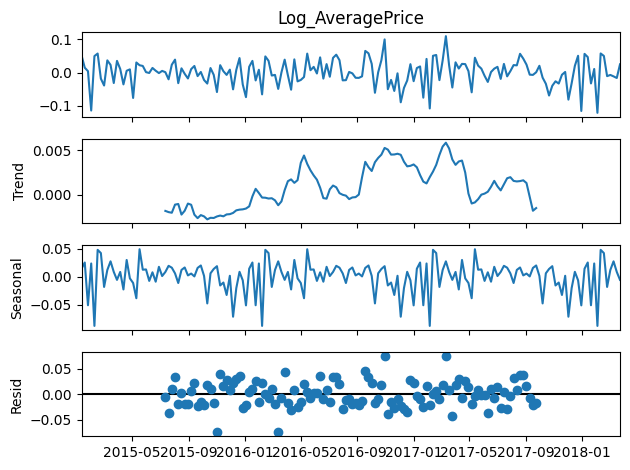

In [ ]:
# Import necessary libraries
import numpy as np

# Calculate the logarithm of the 'AveragePrice' column and assign it to a new column 'Log_AveragePrice'
df1['Log_AveragePrice'] = np.log(df1['AveragePrice'])

# Calculate the first-order difference of the 'Log_AveragePrice' column
df1_log_diff = df1['Log_AveragePrice'].diff()

# Drop the first row (which contains NaN) from the differenced series
df1_log_diff = df1_log_diff.dropna()

# Perform seasonal decomposition on the differenced series with a period of 52 (weeks) and plot the results
result = sm.tsa.seasonal_decompose(df1_log_diff, period=52).plot()

# Display the plot
plt.show()


In [ ]:

# Convert the differenced series 'df1_log_diff' to a pandas Series
df1_log_diff = pd.Series(df1_log_diff)



In [ ]:
#ADF Test

from statsmodels.tsa.stattools import adfuller

result = adfuller(df1_log_diff)

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

if result[1] <= 0.05:
    print("Reject the null hypothesis. Data is stationary.")
else:
    print("Fail to reject the null hypothesis. Data is non-stationary.")


ADF Statistic: -13.817737846801727
p-value: 8.010524004625079e-26
Critical Values:
   1%: -3.470126426071447
   5%: -2.8790075987120027
   10%: -2.5760826967621644
Reject the null hypothesis. Data is stationary.


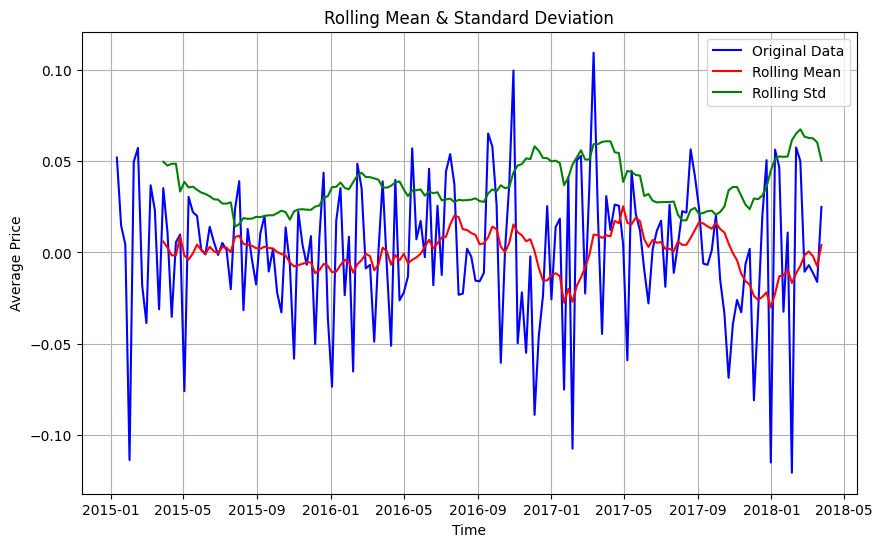

In [ ]:
#Test: Rolling Statistics

window_size = 12
rolling_mean = df1_log_diff.rolling(window=window_size).mean()
rolling_std = df1_log_diff.rolling(window=window_size).std()

# Plot the original time series data and the rolling statistics
plt.figure(figsize=(10, 6))
plt.plot(df1_log_diff, color='blue', label='Original Data')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='green', label='Rolling Std')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Time')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# The Augmented Dickey Fuller Test results indicate that the time series data is stationary.
# This means that it doesn't have a trend and its statistical properties remain constant over time.
# The test statistic of -13.82 is much lower than the critical value at the 1% significance level, which is -2.88.
# This suggests a strong rejection of the null hypothesis that the data is non-stationary.
# Additionally, the p-value is extremely low (0.00), indicating strong evidence against the null hypothesis.
# Therefore, we reject the null hypothesis and accept the alternative hypothesis that the time series is stationary.

Modeling

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Define a function named tsplot for time series analysis
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    # Convert the input to a pandas Series if it's not already
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    # Set the plot style
    with plt.style.context(style):
        # Create a new figure with a specified size
        fig = plt.figure(figsize=figsize)

        # Define the layout of subplots
        layout = (2, 2)

        # Create the time series plot
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)

        # Create the autocorrelation plot
        acf_ax = plt.subplot2grid(layout, (1, 0))

        # Create the partial autocorrelation plot
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        # Plot the time series data
        y.plot(ax=ts_ax)

        # Calculate the p-value using the Dickey-Fuller test for stationarity
        p_value = sm.tsa.stattools.adfuller(y)[1]

        # Set the title for the time series plot
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))

        # Plot the autocorrelation function (ACF)
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)

        # Plot the partial autocorrelation function (PACF)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)

        # Adjust the layout of subplots to prevent overlap
        plt.tight_layout()


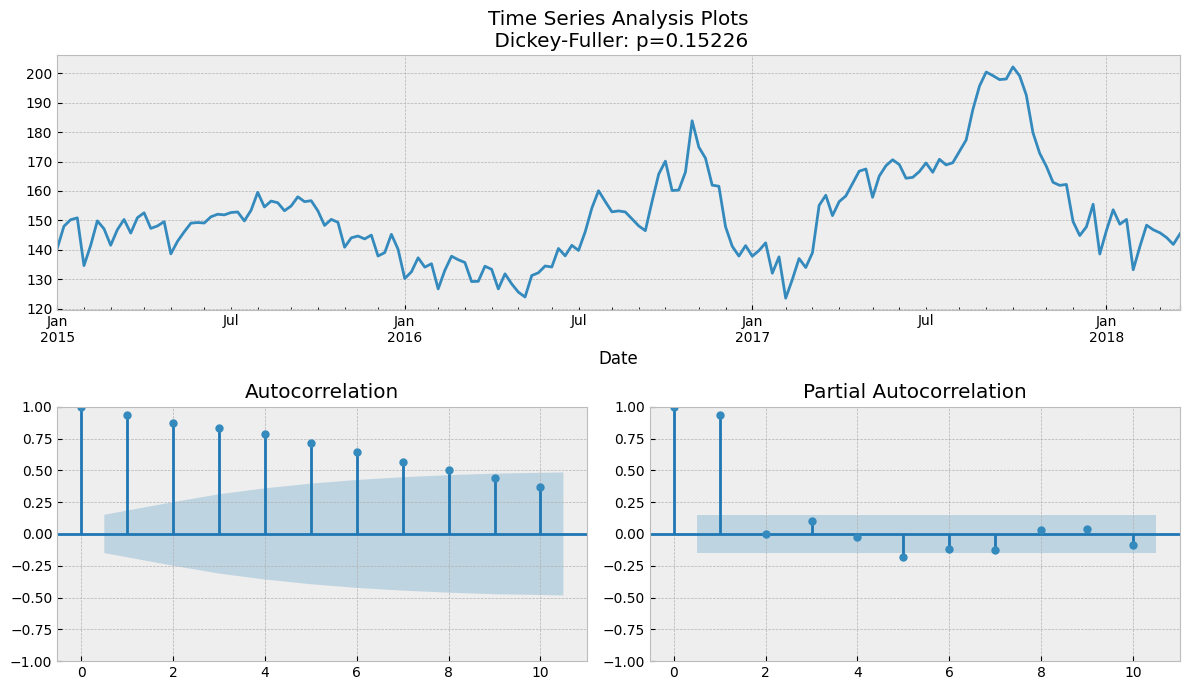

In [ ]:

# Call the tsplot function with the 'AveragePrice' column of df1 as input and set the number of lags to 10
tsplot(df1['AveragePrice'], lags=10)

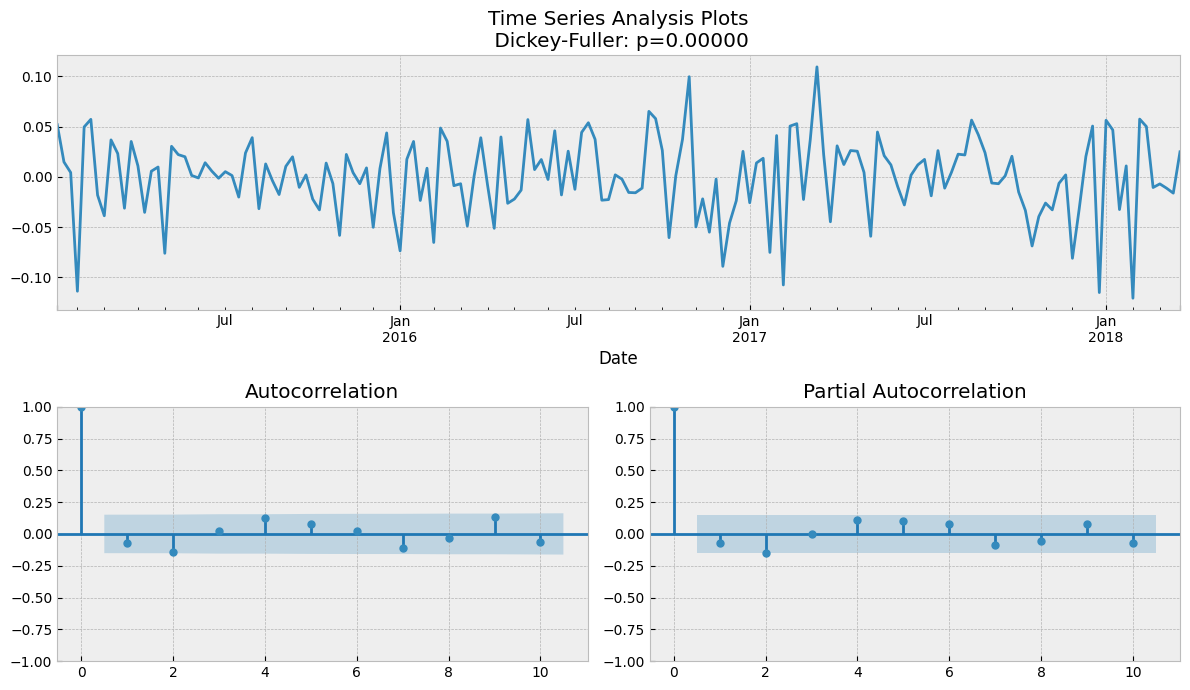

In [ ]:
# Call the tsplot function with the differenced series df1_log_diff as input and set the number of lags to 10
tsplot(df1_log_diff, lags=10)

In [ ]:
#From the analysis conducted, it has been determined that an ARIMA model with parameters p=1, d=1, and q=2 is deemed suitable for the dataset.

In [ ]:
# Import the ARIMA model from statsmodels
from statsmodels.tsa.arima.model import ARIMA

# Create an ARIMA model with order (p=1, d=1, q=2) using the 'Log_AveragePrice' column of df1
model = ARIMA(df1['Log_AveragePrice'], order=(1, 1, 2))

# Fit the ARIMA model to the data
model_fit = model.fit()

# Print a summary of the model fit
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:       Log_AveragePrice   No. Observations:                  169
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 308.987
Date:                Fri, 19 Apr 2024   AIC                           -609.975
Time:                        05:14:44   BIC                           -597.479
Sample:                    01-04-2015   HQIC                          -604.904
                         - 03-25-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1492      0.785     -0.190      0.849      -1.689       1.390
ma.L1          0.0735      0.776      0.095      0.925      -1.448       1.595
ma.L2         -0.1239      0.099     -1.252      0.2

In [ ]:
# Print initial predictions to check their range
print(model_fit.fittedvalues.head())

Date
2015-01-04    0.000000
2015-01-11    4.945492
2015-01-18    4.993892
2015-01-25    5.005056
2015-02-01    5.014511
Freq: W-SUN, dtype: float64


In [ ]:
# Assuming 'model_fit.fittedvalues' are your original ARIMA model predictions
predictions_ARIMA = pd.Series(model_fit.fittedvalues, copy=True)

# Ensure no invalid numbers before transformation
predictions_ARIMA.replace([np.inf, -np.inf, np.nan], 0, inplace=True)

# Reversing the 1st order Differencing by taking cumulative sum
predictions_ARIMA_cumsum = predictions_ARIMA.cumsum()

# Check if cumulative sum introduces any infinities
if not np.isfinite(predictions_ARIMA_cumsum).all():
    print('Cumulative sum contains non-finite numbers')

# Creating a series with the same length as the original 'Log_AveragePrice'
expected_log_values = pd.Series(df1['Log_AveragePrice'].iloc[0], index=df1.index)

# Adding the elements of this newly created series with the cumulative sum series
expected_log_values = expected_log_values.add(predictions_ARIMA_cumsum, fill_value=0)

# Check for infinities after addition
if not np.isfinite(expected_log_values).all():
    print('Addition results contain non-finite numbers')

# Taking exponential of the above series for getting the original values
predictions_ARIMA_final = np.exp(expected_log_values)

# Check for infinities after exponential operation
if not np.isfinite(predictions_ARIMA_final).all():
    print('Exponential results contain non-finite numbers')

Exponential results contain non-finite numbers


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Forecasted Series: 2018-04-01    4.979977
2018-04-08    4.977203
2018-04-15    4.977617
2018-04-22    4.977555
2018-04-29    4.977564
                ...   
2021-05-23    4.977563
2021-05-30    4.977563
2021-06-06    4.977563
2021-06-13    4.977563
2021-06-20    4.977563
Freq: W-SUN, Name: predicted_mean, Length: 169, dtype: float64
                               SARIMAX Results                                
Dep. Variable:       Log_AveragePrice   No. Observations:                  169
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 308.987
Date:                Fri, 19 Apr 2024   AIC                           -609.975
Time:                        05:14:44   BIC                           -597.479
Sample:                    01-04-2015   HQIC                          -604.904
                         - 03-25-2018                                         
Covariance Type:                  opg                                         
                 coef    std err 

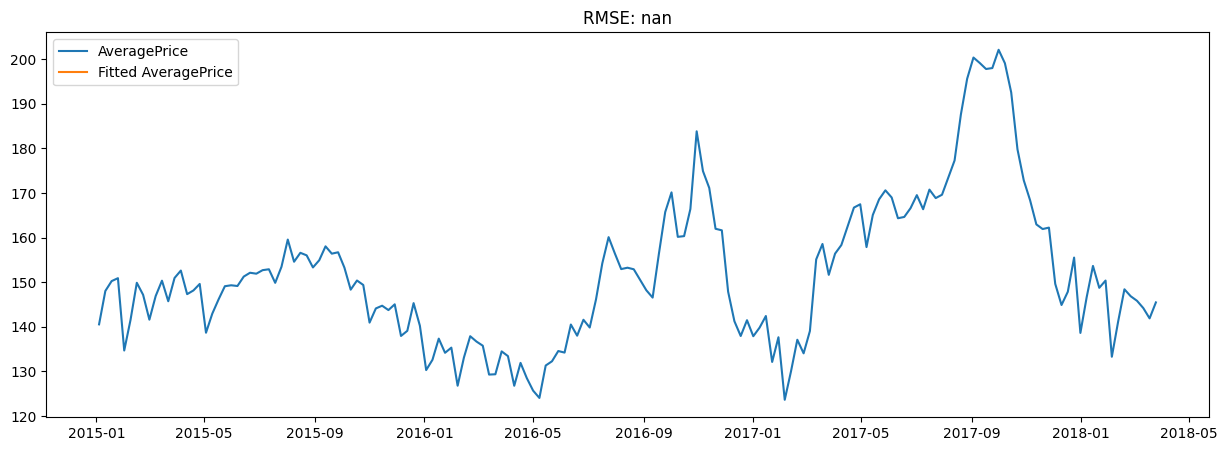

In [ ]:
# Assuming df1['Log_AveragePrice'] is already defined
model = ARIMA(df1['Log_AveragePrice'], order=(1, 1, 2))
model_fit = model.fit()

# Forecasting the next values using the ARIMA model
forecast = model_fit.forecast(steps=len(df1['Log_AveragePrice']))

# Print the forecasted series
print("Forecasted Series:", forecast)

# Check for issues in the ARIMA model
print(model_fit.summary())

# Creating a series with the forecast values
predictions_ARIMA_final = pd.Series(forecast, index=df1.index)

# Taking the exponent to get the original values
predictions_ARIMA_final = np.exp(predictions_ARIMA_final)

# Check for missing values
print("Missing values in 'AveragePrice':", df1['AveragePrice'].isnull().sum())
print("Missing values in 'predictions_ARIMA_final':", predictions_ARIMA_final.isnull().sum())

# Visualization
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
plt.plot(df1['AveragePrice'], label='AveragePrice')
plt.plot(predictions_ARIMA_final, label='Fitted AveragePrice')
plt.legend(loc="upper left")

# Calculate and print RMSE
rmse = np.sqrt(sum((predictions_ARIMA_final - df1['AveragePrice'])**2) / len(df1['AveragePrice']))
print("RMSE:", rmse)

plt.title('RMSE: %.4f' % rmse)
plt.show()


In [ ]:
# Check for missing values
missing_values = df1['Log_AveragePrice'].isnull().sum()
print("Number of missing values:", missing_values)

# Check for invalid values (e.g., infinity or NaN)
invalid_values = df1['Log_AveragePrice'].isin([np.inf, -np.inf, np.nan]).sum()
print("Number of invalid values:", invalid_values)

# Summary statistics of the time series data
summary_stats = df1['Log_AveragePrice'].describe()
print("\nSummary Statistics:")
print(summary_stats)

Number of missing values: 0
Number of invalid values: 0

Summary Statistics:
count    169.000000
mean       5.017216
std        0.103809
min        4.817293
25%        4.945207
50%        5.007965
75%        5.075736
max        5.308763
Name: Log_AveragePrice, dtype: float64


Missing values in 'predictions_ARIMA_final': 0
RMSE: 17.64836791889663


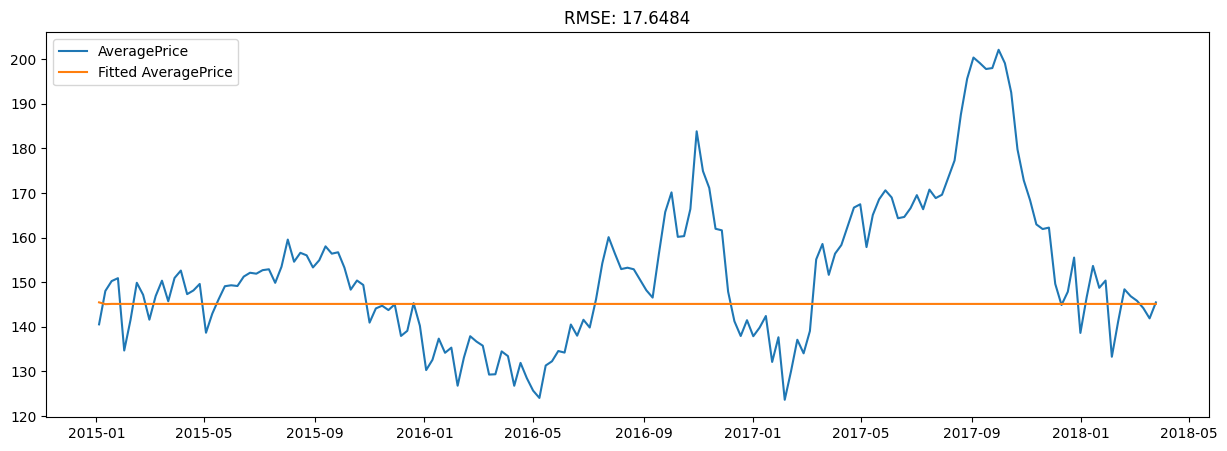

In [ ]:
# Forecasting the next values using the ARIMA model
forecast = model_fit.get_forecast(steps=len(df1['Log_AveragePrice']))

# Extracting the mean forecast values
mean_forecast = forecast.predicted_mean

# Checking for negative values in the forecast
if (mean_forecast < 0).any():
    print("Warning: Negative values in the forecasted series.")

# Taking the exponent to get the original values
predictions_ARIMA_final = np.exp(mean_forecast)

# Ensure the indices of the forecast align with the original data
predictions_ARIMA_final.index = df1.index

# Check for missing values in the forecasted series
missing_values_forecast = predictions_ARIMA_final.isnull().sum()
print("Missing values in 'predictions_ARIMA_final':", missing_values_forecast)

# Visualization
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
plt.plot(df1['AveragePrice'], label='AveragePrice')
plt.plot(predictions_ARIMA_final, label='Fitted AveragePrice')
plt.legend(loc="upper left")

# Calculate and print RMSE
rmse = np.sqrt(sum((predictions_ARIMA_final - df1['AveragePrice'])**2) / len(df1['AveragePrice']))
print("RMSE:", rmse)

plt.title('RMSE: %.4f' % rmse)
plt.show()

In [ ]:
size = int(len(df1) - 30)
train, test = df1['Log_AveragePrice'][0:size], df1['Log_AveragePrice'][size:len(df1)]

print('\t ARIMA MODEL : In - Sample Forecasting \n')

history = [x for x in train]
predictions = []

for t in range(len(test)):

    model = ARIMA(history, order=(1, 1, 2))
    model_fit = model.fit()  # Remove 'disp' parameter

    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(float(yhat))

    obs = test[t]
    history.append(obs)

    print('predicted = %f, expected = %f' % (np.exp(yhat), np.exp(obs)))

	 ARIMA MODEL : In - Sample Forecasting 

predicted = 193.441394, expected = 200.360000
predicted = 198.861659, expected = 199.140000
predicted = 198.355802, expected = 197.790000
predicted = 197.806778, expected = 198.000000
predicted = 198.054481, expected = 202.100000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 201.822165, expected = 199.080000
predicted = 198.778823, expected = 192.550000
predicted = 193.253533, expected = 179.770000
predicted = 181.076039, expected = 172.820000
predicted = 174.468844, expected = 168.380000
predicted = 169.257551, expected = 162.950000
predicted = 163.574187, expected = 161.910000
predicted = 162.489580, expected = 162.230000
predicted = 162.371562, expected = 149.620000
predicted = 149.803467, expected = 144.880000
predicted = 145.945385, expected = 147.850000
predicted = 148.235664, expected = 155.510000
predicted = 155.320965, expected = 138.620000
predicted = 138.370209, expected = 146.640000
predicted = 147.703705, expected = 153.640000
predicted = 152.316555, expected = 148.730000
predicted = 148.450588, expected = 150.360000
predicted = 150.693718, expected = 133.280000
predicted = 134.012983, expected = 141.160000
predicted = 142.229262, expected = 148.400000
predicted = 146.818098, expected = 146.840000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 146.361398, expected = 145.820000
predicted = 145.930717, expected = 144.190000
predicted = 144.368242, expected = 141.880000
predicted = 142.246664, expected = 145.460000


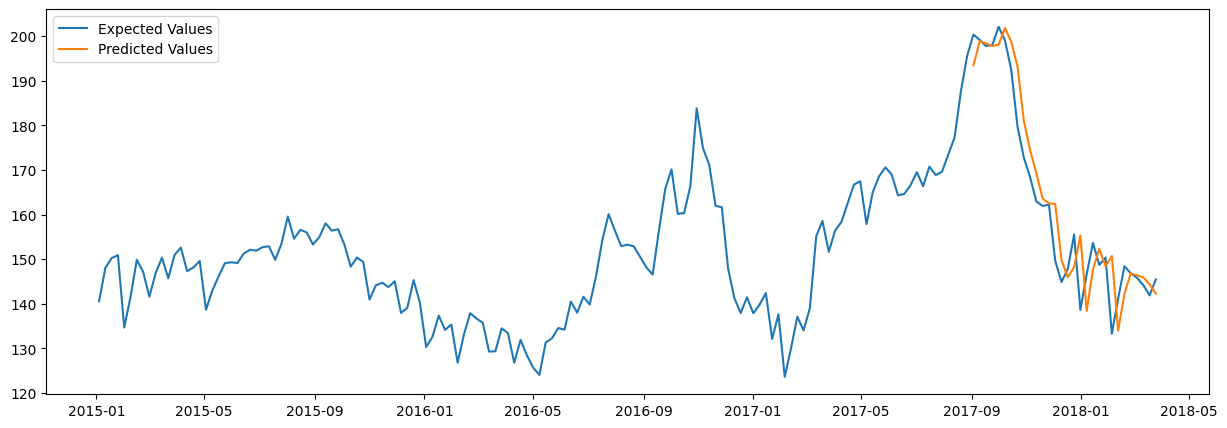

In [ ]:
predictions_series = pd.Series(predictions, index = test.index)
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5))

plt.subplot(1,1,1)
plt.plot(df1['AveragePrice'],label = 'Expected Values')
plt.plot(np.exp(predictions_series),label = 'Predicted Values');
plt.legend(loc="upper left")
plt.show()

In [ ]:
#In Sample Forecasting
from sklearn.metrics import mean_squared_error

size = int(len(df1) - 30)
train, test = df1['Log_AveragePrice'][0:size], df1['Log_AveragePrice'][size:len(df1)]

print('\t ARIMA MODEL : In - Sample Forecasting \n')

history = [x for x in train]
predictions = []

for t in range(len(test)):

    model = ARIMA(history, order=(1, 1, 2))
    model_fit = model.fit()  # Remove 'disp' parameter

    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(float(yhat))

    obs = test[t]
    history.append(obs)

    print('predicted = %f, expected = %f' % (np.exp(yhat), np.exp(obs)))

error = np.sqrt(mean_squared_error(np.exp(test), np.exp(predictions)))
print('Test RMSE: %.4f' % error)
predictions_series = pd.Series(np.exp(predictions), index=test.index)

	 ARIMA MODEL : In - Sample Forecasting 

predicted = 193.441394, expected = 200.360000
predicted = 198.861659, expected = 199.140000
predicted = 198.355802, expected = 197.790000
predicted = 197.806778, expected = 198.000000
predicted = 198.054481, expected = 202.100000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 201.822165, expected = 199.080000
predicted = 198.778823, expected = 192.550000
predicted = 193.253533, expected = 179.770000
predicted = 181.076039, expected = 172.820000
predicted = 174.468844, expected = 168.380000
predicted = 169.257551, expected = 162.950000
predicted = 163.574187, expected = 161.910000
predicted = 162.489580, expected = 162.230000
predicted = 162.371562, expected = 149.620000
predicted = 149.803467, expected = 144.880000
predicted = 145.945385, expected = 147.850000
predicted = 148.235664, expected = 155.510000
predicted = 155.320965, expected = 138.620000
predicted = 138.370209, expected = 146.640000
predicted = 147.703705, expected = 153.640000
predicted = 152.316555, expected = 148.730000
predicted = 148.450588, expected = 150.360000
predicted = 150.693718, expected = 133.280000
predicted = 134.012983, expected = 141.160000
predicted = 142.229262, expected = 148.400000
predicted = 146.818098, expected = 146.840000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 146.361398, expected = 145.820000
predicted = 145.930717, expected = 144.190000
predicted = 144.368242, expected = 141.880000
predicted = 142.246664, expected = 145.460000
Test RMSE: 7.0601


In [ ]:
#  Out of Sample Forecasting

from pandas.tseries.offsets import DateOffset
future_dates = [df1.index[-1] + DateOffset(weeks = x) for x in range(0,52)]

# New dataframe for storing the future values
df2 = pd.DataFrame(index = future_dates[1:],columns = df1.columns)

forecast = pd.concat([df1,df2])
forecast['ARIMA_Forecast_Function'] = np.NaN
forecast['ARIMA_Predict_Function'] = np.NaN
forecast.head()

,AveragePrice,Log_AveragePrice,ARIMA_Forecast_Function,ARIMA_Predict_Function
2015-01-04,140.54,4.945492,NaN,NaN
2015-01-11,148.03,4.997415,NaN,NaN
2015-01-18,150.24,5.012234,NaN,NaN
2015-01-25,150.89,5.016551,NaN,NaN
2015-02-01,134.68,4.902902,NaN,NaN


In [ ]:
f1 = np.exp(model_fit.forecast(steps=51))

# Check if f1 is a 1-dimensional array
if len(f1.shape) == 1:
    # If f1 is a 1-dimensional array, convert it to a 2-dimensional array
    f1 = f1.reshape(-1, 1)

for i in range(51):
    forecast.iloc[169 + i, 2] = f1[i]

forecast.tail()

,AveragePrice,Log_AveragePrice,ARIMA_Forecast_Function,ARIMA_Predict_Function
2019-02-17,NaN,NaN,142.46427,NaN
2019-02-24,NaN,NaN,142.46427,NaN
2019-03-03,NaN,NaN,142.46427,NaN
2019-03-10,NaN,NaN,142.46427,NaN
2019-03-17,NaN,NaN,142.46427,NaN


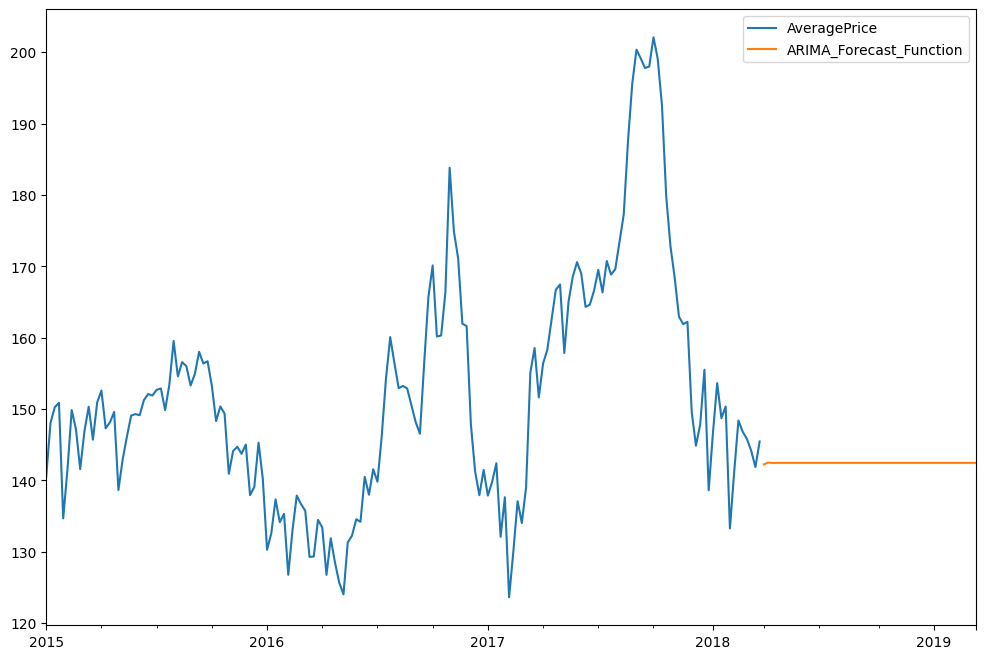

In [ ]:
forecast[['AveragePrice','ARIMA_Forecast_Function']].plot(figsize = (12,8));

The model clearly did not capture the seasonal patterns of the data. Now, we will conduct the SARIMA model to capture the seasonality in the data. For our data, it is in weekly format and the seasonal period is of 1 year. Hence, we difference the already differenced data by a periodicity, M, value of 52. We can observe that the seasonality of the data nearabout gone with y-axis values ranging from -0.1 to 0.1. We will check this seasonal differenced data for stationarity.

SARIMA MODEL

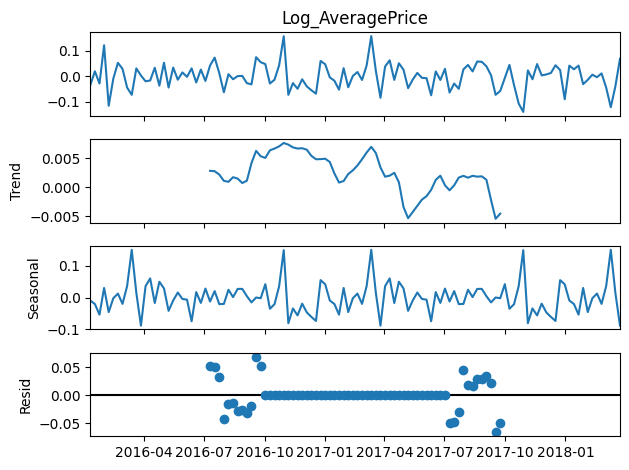

In [ ]:
# Create a differenced series with a seasonal period of 52 weeks
df1_log_diff_seas = df1_log_diff.diff(52)

# Drop the first row (which contains NaN) from the differenced series
df1_log_diff_seas = df1_log_diff_seas.dropna()

# Perform seasonal decomposition on the differenced series and plot the results
dec = sm.tsa.seasonal_decompose(df1_log_diff_seas).plot()

# Display the plot
plt.show()


In [ ]:
#ADF Test

from statsmodels.tsa.stattools import adfuller

result = adfuller(df1_log_diff_seas)

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

if result[1] <= 0.05:
    print("Reject the null hypothesis. Data is stationary.")
else:
    print("Fail to reject the null hypothesis. Data is non-stationary.")

ADF Statistic: -4.5961512167007115
p-value: 0.00013129607613372957
Critical Values:
   1%: -3.4948504603223145
   5%: -2.889758398668639
   10%: -2.5818220155325444
Reject the null hypothesis. Data is stationary.


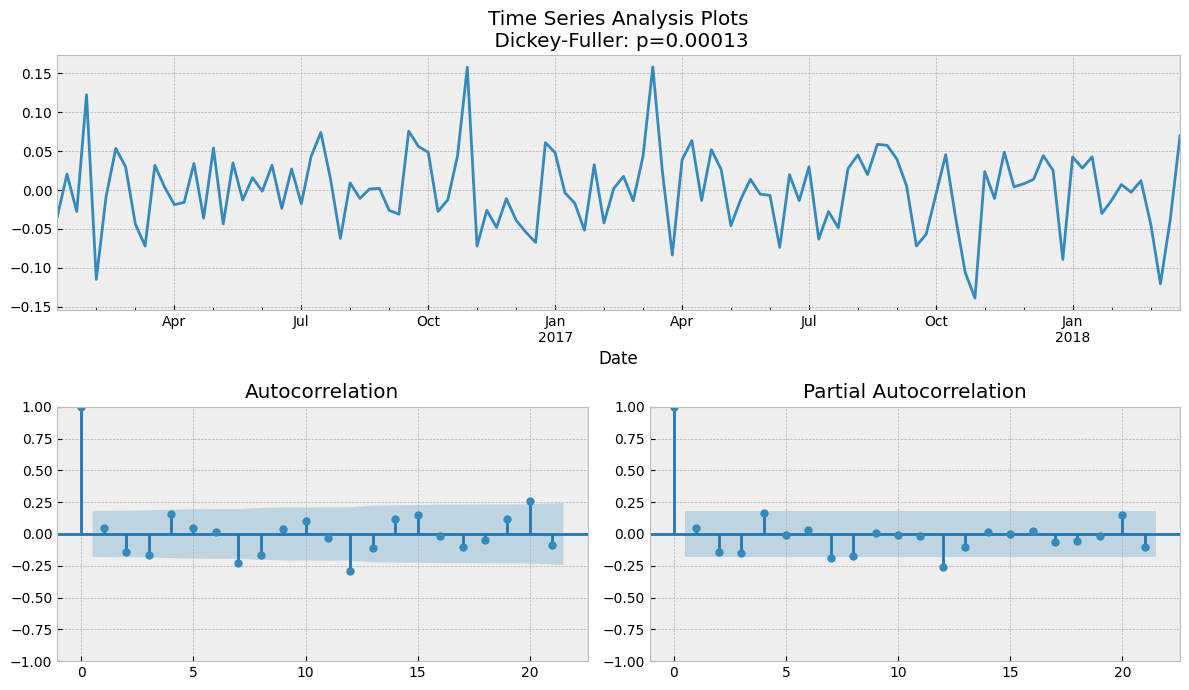

In [ ]:
tsplot(df1_log_diff_seas)

In [ ]:
model = sm.tsa.statespace.SARIMAX(df1['Log_AveragePrice'],order = (1,1,2),seasonal_order = (0,1,0,52))
model_fit = model.fit()
print(model_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                    Log_AveragePrice   No. Observations:                  169
Model:             SARIMAX(1, 1, 2)x(0, 1, [], 52)   Log Likelihood                 184.924
Date:                             Fri, 19 Apr 2024   AIC                           -361.848
Time:                                     05:15:10   BIC                           -350.834
Sample:                                 01-04-2015   HQIC                          -357.377
                                      - 03-25-2018                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7792      0.166      4.696      0.000       0.454       1.104
ma.L1         -0.7519      

In [ ]:
#In Sample Forecasting
size = int(len(df1) - 30)
train, test = df1['Log_AveragePrice'][0:size], df1['Log_AveragePrice'][size:len(df1)]

print('\t SARIMA MODEL : In - Sample Forecasting \n')

history = [x for x in train]
predictions = []

for t in range(len(test)):

    model = sm.tsa.statespace.SARIMAX(history,order = (1,1,2),seasonal_order = (0,1,0,52))
    model_fit = model.fit(disp = 0)

    output = model_fit.forecast()

    yhat = output[0]
    predictions.append(float(yhat))

    obs = test[t]
    history.append(obs)

    print('predicted = %f, expected = %f' % (np.exp(yhat), np.exp(obs)))

	 SARIMA MODEL : In - Sample Forecasting 

predicted = 190.139066, expected = 200.360000
predicted = 196.126495, expected = 199.140000
predicted = 211.037017, expected = 197.790000
predicted = 207.504225, expected = 198.000000
predicted = 202.787502, expected = 202.100000
predicted = 190.648998, expected = 199.080000
predicted = 199.363336, expected = 192.550000
predicted = 199.445814, expected = 179.770000
predicted = 199.347657, expected = 172.820000
predicted = 165.636797, expected = 168.380000
predicted = 169.250186, expected = 162.950000
predicted = 156.631422, expected = 161.910000
predicted = 164.719655, expected = 162.230000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 150.102117, expected = 149.620000
predicted = 144.451707, expected = 144.880000
predicted = 142.802795, expected = 147.850000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 152.898609, expected = 155.510000
predicted = 151.978344, expected = 138.620000
predicted = 140.295198, expected = 146.640000
predicted = 150.886886, expected = 153.640000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 142.549652, expected = 148.730000
predicted = 155.136774, expected = 150.360000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 134.572446, expected = 133.280000
predicted = 140.249573, expected = 141.160000
predicted = 149.049635, expected = 148.400000
predicted = 145.166073, expected = 146.840000
predicted = 152.441971, expected = 145.820000
predicted = 162.540832, expected = 144.190000
predicted = 147.750965, expected = 141.880000
predicted = 137.901462, expected = 145.460000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


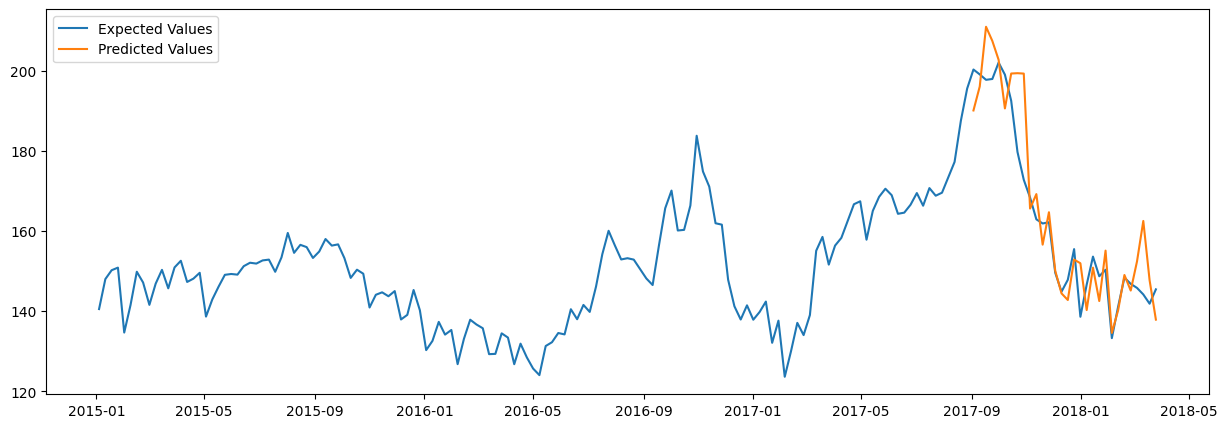

In [ ]:
predictions_series = pd.Series(predictions, index = test.index)
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5))

plt.subplot(1,1,1)
plt.plot(df1['AveragePrice'],label = 'Expected Values')
plt.plot(np.exp(predictions_series),label = 'Predicted Values');
plt.legend(loc="upper left")
plt.show()

In [ ]:
error = np.sqrt(mean_squared_error(np.exp(test),np.exp(predictions)))
print('Test RMSE: %.4f' % error)
predictions_series = pd.Series(np.exp(predictions), index = test.index)

Test RMSE: 9.0690


In [ ]:
#Out of Sample Forecasting
forecast['SARIMA_Forecast_Function'] = np.NaN
forecast['SARIMA_Predict_Function'] = np.NaN
forecast.head()

,AveragePrice,Log_AveragePrice,ARIMA_Forecast_Function,ARIMA_Predict_Function,SARIMA_Forecast_Function,SARIMA_Predict_Function
2015-01-04,140.54,4.945492,NaN,NaN,NaN,NaN
2015-01-11,148.03,4.997415,NaN,NaN,NaN,NaN
2015-01-18,150.24,5.012234,NaN,NaN,NaN,NaN
2015-01-25,150.89,5.016551,NaN,NaN,NaN,NaN
2015-02-01,134.68,4.902902,NaN,NaN,NaN,NaN


In [ ]:
f3 = np.array(np.exp(model_fit.forecast(steps = 51)))

for i in range(len(f3)):
    forecast.iloc[169 + i,4] = f3[i]
forecast.tail()

,AveragePrice,Log_AveragePrice,ARIMA_Forecast_Function,ARIMA_Predict_Function,SARIMA_Forecast_Function,SARIMA_Predict_Function
2019-02-17,NaN,NaN,142.46427,NaN,140.441132,NaN
2019-02-24,NaN,NaN,142.46427,NaN,147.644331,NaN
2019-03-03,NaN,NaN,142.46427,NaN,146.092329,NaN
2019-03-10,NaN,NaN,142.46427,NaN,145.077565,NaN
2019-03-17,NaN,NaN,142.46427,NaN,143.455898,NaN


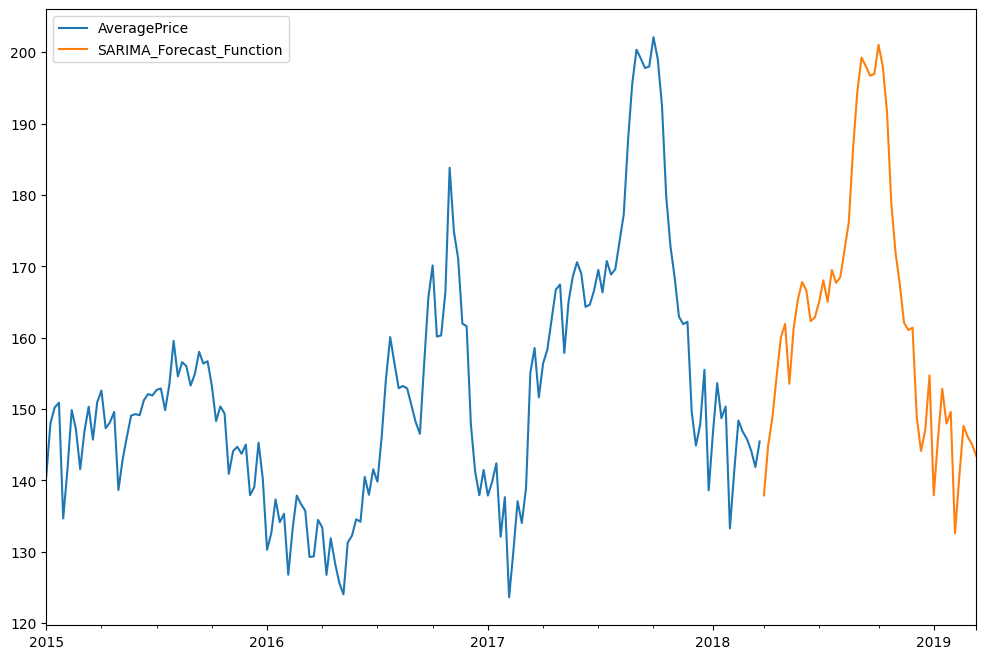

In [ ]:
forecast[['AveragePrice','SARIMA_Forecast_Function']].plot(figsize = (12,8));

In [ ]:
f4 = np.array(np.exp(model_fit.predict(start = 169,end = 219,typ = 'levels')))

for i in range(51):
    forecast.iloc[169 + i,5] = f4[i]
forecast.tail()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


,AveragePrice,Log_AveragePrice,ARIMA_Forecast_Function,ARIMA_Predict_Function,SARIMA_Forecast_Function,SARIMA_Predict_Function
2019-02-17,NaN,NaN,142.46427,NaN,140.441132,147.644331
2019-02-24,NaN,NaN,142.46427,NaN,147.644331,146.092329
2019-03-03,NaN,NaN,142.46427,NaN,146.092329,145.077565
2019-03-10,NaN,NaN,142.46427,NaN,145.077565,143.455898
2019-03-17,NaN,NaN,142.46427,NaN,143.455898,141.157685


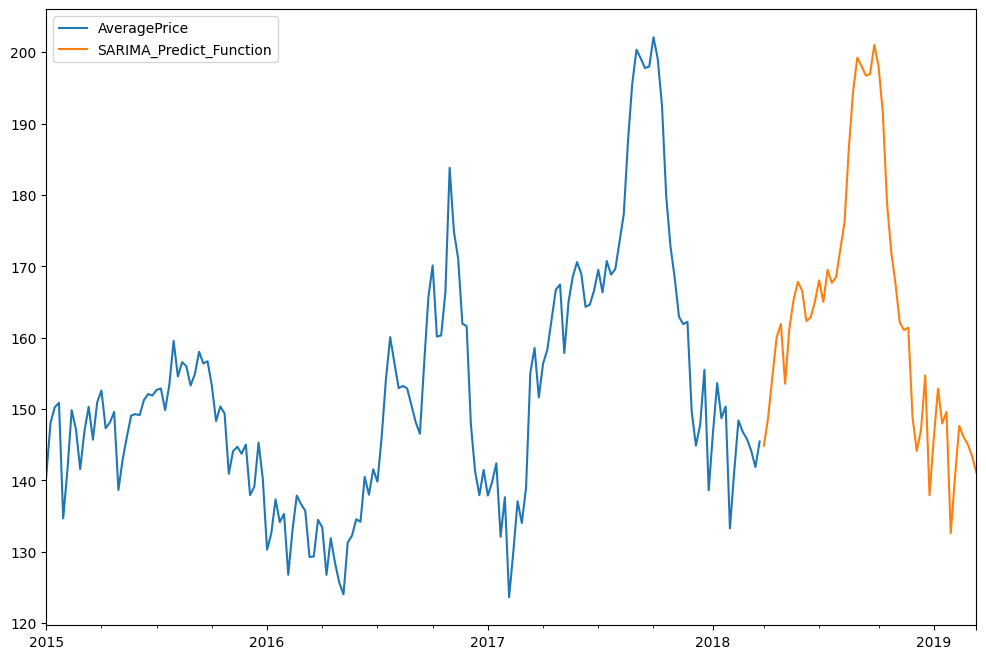

In [ ]:
forecast[['AveragePrice','SARIMA_Predict_Function']].plot(figsize = (12,8));

Now, this model captured the seasonal patterns of the data much better!

**ML model**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# import pandas as pd

# file_path = '/content/drive/My Drive/avocado.csv'
# data = pd.read_csv(file_path)
# data.sort_index(inplace=True)

In [ ]:
# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['AveragePrice'].values.reshape(-1, 1))

In [ ]:
# Convert series to supervised learning problem
def series_to_supervised(data, window=1):
    df = pd.DataFrame(data)
    cols = [df.shift(i) for i in range(1, window + 1)]
    cols.append(df)
    df = pd.concat(cols, axis=1)
    df.dropna(inplace=True)
    return df.values

In [ ]:
window = 4
series = series_to_supervised(scaled_data, window)
X, y = series[:, :-1], series[:, -1]

In [ ]:
# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# LSTM expects input to be in the shape [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Fit the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test),
                    callbacks=[early_stopping], verbose=2)

Epoch 1/100
457/457 - 7s - loss: 0.0064 - val_loss: 0.0038 - 7s/epoch - 16ms/step
Epoch 2/100
457/457 - 3s - loss: 0.0037 - val_loss: 0.0037 - 3s/epoch - 6ms/step
Epoch 3/100
457/457 - 3s - loss: 0.0037 - val_loss: 0.0040 - 3s/epoch - 8ms/step
Epoch 4/100
457/457 - 3s - loss: 0.0036 - val_loss: 0.0036 - 3s/epoch - 6ms/step
Epoch 5/100
457/457 - 3s - loss: 0.0037 - val_loss: 0.0036 - 3s/epoch - 5ms/step
Epoch 6/100
457/457 - 3s - loss: 0.0037 - val_loss: 0.0038 - 3s/epoch - 6ms/step
Epoch 7/100
457/457 - 3s - loss: 0.0036 - val_loss: 0.0036 - 3s/epoch - 8ms/step
Epoch 8/100
457/457 - 3s - loss: 0.0036 - val_loss: 0.0036 - 3s/epoch - 6ms/step
Epoch 9/100
457/457 - 3s - loss: 0.0036 - val_loss: 0.0036 - 3s/epoch - 7ms/step
Epoch 10/100
457/457 - 3s - loss: 0.0036 - val_loss: 0.0040 - 3s/epoch - 6ms/step
Epoch 11/100
457/457 - 4s - loss: 0.0036 - val_loss: 0.0039 - 4s/epoch - 8ms/step
Epoch 12/100
457/457 - 3s - loss: 0.0037 - val_loss: 0.0036 - 3s/epoch - 6ms/step
Epoch 13/100
457/457 - 3

In [ ]:
# Evaluate the model
predicted_price = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price)
real_price = scaler.inverse_transform(y_test.reshape(-1, 1))

115/115 [==============================] - 1s 3ms/step


In [ ]:
# Calculate RMSE
rmse_lstm = np.sqrt(np.mean(np.power((real_price - predicted_price), 2)))
print('RMSE for LSTM:', rmse_lstm)

RMSE for LSTM: 0.16894741188481327
